In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings(action='ignore')

## [Data Cleaning](#1)

## [Variables Visualization](#2)
> ### [Numerical Variable](#2.1)
> ### [Categorical Variable](#2.2)


## [ML Algorithms - Original Dataset](#4)

## [ML Algorithms - SMOTE](#5)

## [ML Algorithms - Adaptive Synthetic](#6)

<a id="1"></a >
## Data Cleaning 

In [2]:
df = pd.read_csv('application_train.csv')

In [3]:
df_train = df.copy()

In [4]:
df.shape

(307511, 122)

In [5]:
missing_per = df_train.isnull().mean().sort_values(ascending = False)
pd.DataFrame(missing_per[missing_per > 0.5], columns = ['Missing Value Rate'])

,Missing Value Rate
COMMONAREA_MEDI,0.698723
COMMONAREA_AVG,0.698723
COMMONAREA_MODE,0.698723
NONLIVINGAPARTMENTS_MODE,0.694330
NONLIVINGAPARTMENTS_AVG,0.694330
NONLIVINGAPARTMENTS_MEDI,0.694330
FONDKAPREMONT_MODE,0.683862
LIVINGAPARTMENTS_MODE,0.683550
LIVINGAPARTMENTS_AVG,0.683550
LIVINGAPARTMENTS_MEDI,0.683550


In [6]:
df_train['NAME_CONTRACT_TYPE'] = np.where(df['NAME_CONTRACT_TYPE'] == 'Cash loans', 1, 0)
df_train['CODE_GENDER'] = df_train['CODE_GENDER'].replace({'XNA':'F'})
df_train['CODE_GENDER'] = np.where(df['CODE_GENDER'] == 'M', 1, 0)
df_train['FLAG_OWN_CAR'] = np.where(df['FLAG_OWN_CAR'] == 'Y', 1, 0)
df_train['FLAG_OWN_REALTY'] = np.where(df['FLAG_OWN_REALTY'] == 'Y', 1, 0)
df_train['AMT_ANNUITY'].fillna(df_train['AMT_ANNUITY'].median(), inplace=True)
df_train['AMT_GOODS_PRICE'].fillna(df_train['AMT_GOODS_PRICE'].median(), inplace=True)

In [7]:
df_train['NAME_TYPE_SUITE'] = df_train['NAME_TYPE_SUITE'].fillna('Unaccompanied')
suite_df = pd.get_dummies(df_train['NAME_TYPE_SUITE'])

for i in df_train['NAME_TYPE_SUITE'].sort_values(ascending=True).unique()[1:]:
    df_train['TYPE_SUITE_' + str(i.replace(" ", "_").upper())] = suite_df[i]

df_train = df_train.drop(labels = 'NAME_TYPE_SUITE', axis = 1)

In [8]:
income_df = pd.get_dummies(df_train['NAME_INCOME_TYPE'])

for i in df_train['NAME_INCOME_TYPE'].sort_values(ascending=True).unique()[1:]:
    df_train['INCOME_' + str(i.replace(" ", "_").upper())] = income_df[i] 

df_train = df_train.drop(labels = 'NAME_INCOME_TYPE', axis = 1)

In [9]:
education_df = pd.get_dummies(df_train['NAME_EDUCATION_TYPE'])

for i in df_train['NAME_EDUCATION_TYPE'].sort_values(ascending = True).unique()[1:]:
    df_train['EDUCATION_' + str(i.replace(" ", '_').upper())] = education_df[i]

df_train = df_train.drop(labels = 'NAME_EDUCATION_TYPE', axis = 1)

In [10]:
df_train['NAME_FAMILY_STATUS'] = df_train['NAME_FAMILY_STATUS'].replace({'Unknown':'Married'})
family_df = pd.get_dummies(df_train['NAME_FAMILY_STATUS'])

for i in df_train['NAME_FAMILY_STATUS'].sort_values(ascending = True).unique()[1:]:
    df_train['FAMILY_' + str(i.replace(" ", '_').upper())] = family_df[i]

df_train = df_train.drop(labels = 'NAME_FAMILY_STATUS', axis = 1)

In [11]:
house_df = pd.get_dummies(df_train['NAME_HOUSING_TYPE'])

for i in df_train['NAME_HOUSING_TYPE'].sort_values(ascending=True).unique()[1:]:
    df_train['HOUSING_' + str(i.replace(" ", '_').upper())] = house_df[i]


df_train = df_train.drop(labels = 'NAME_HOUSING_TYPE', axis = 1)

In [12]:
# fill na with median but it may create bias
df_train['OWN_CAR_AGE'] = df_train['OWN_CAR_AGE'].fillna(df_train['OWN_CAR_AGE'].median())

In [13]:
df_train['OCCUPATION_TYPE'] = df_train['OCCUPATION_TYPE'].fillna('Laborers')
occupation_df = pd.get_dummies(df_train['OCCUPATION_TYPE'])

for i in df_train['OCCUPATION_TYPE'].sort_values(ascending = True).unique()[1:]:
    df_train['OCCUPATION_' + str(i.replace(' ', '_').upper())] = occupation_df[i]

df_train = df_train.drop(labels = 'OCCUPATION_TYPE', axis = 1)

In [14]:
df_train['CNT_FAM_MEMBERS'] = df_train['CNT_FAM_MEMBERS'].fillna(df_train['CNT_FAM_MEMBERS'].median());


In [15]:
df_train['ORGANIZATION_TYPE'] = df_train['ORGANIZATION_TYPE'].replace({'Business Entity Type 1':'Business Entity', 
                                     'Business Entity Type 2':'Business Entity', 
                                    'Business Entity Type 3':'Business Entity', 
                                    'Industry: type 1':'Industry', 
                                    'Industry: type 10':'Industry', 
                                    'Industry: type 11': 'Industry', 
                                    'Industry: type 12':'Industry', 
                                    'Industry: type 13': 'Industry', 
                                    'Industry: type 2' : 'Industry', 
                                    'Industry: type 3': 'Industry', 
                                    'Industry: type 4': 'Industry', 
                                    'Industry: type 5': 'Industry', 
                                    'Industry: type 6': 'Industry', 
                                    'Industry: type 7': 'Industry', 
                                    'Industry: type 8': 'Industry', 
                                    'Industry: type 9': 'Industry', 
                                    'Trade: type 1': 'Trade', 
                                    "Trade: type 2": 'Trade', 
                                    'Trade: type 3': 'Trade', 
                                    'Trade: type 4': 'Trade', 
                                    'Trade: type 5': 'Trade', 
                                    'Trade: type 6': 'Trade', 
                                    'Trade: type 7': 'Trade', 
                                    'Transport: type 1': 'Transport', 
                                    'Transport: type 2': 'Transport', 
                                    'Transport: type 3': 'Transport', 
                                    'Transport: type 4': 'Transport'})

df_train['ORGANIZATION_TYPE'] = df_train['ORGANIZATION_TYPE'].replace({"XNA":'Business Entity'})



In [16]:
organization_df = pd.get_dummies(df_train['ORGANIZATION_TYPE'])

for i in df_train['ORGANIZATION_TYPE'].sort_values(ascending=True).unique()[1:]:
    df_train['ORGANIZATION_' + str(i.strip().upper())] = organization_df[i]

df_train = df_train.drop(labels = 'ORGANIZATION_TYPE', axis = 1)

In [17]:
weekday_df = pd.get_dummies(df_train['WEEKDAY_APPR_PROCESS_START'])
for i in df_train['WEEKDAY_APPR_PROCESS_START'].sort_values(ascending=True).unique()[1:]:
    df_train['WEEKDAY_' + str(i.strip().upper())]  = weekday_df[i]
    
df_train.drop(labels = 'WEEKDAY_APPR_PROCESS_START', axis = 1, inplace=True)

In [18]:
df_train['EXT_SOURCE_1'] = df_train['EXT_SOURCE_1'].fillna(df_train['EXT_SOURCE_1'].median())
df_train['EXT_SOURCE_2'] = df_train['EXT_SOURCE_2'].fillna(df_train['EXT_SOURCE_2'].median())
df_train['EXT_SOURCE_3'] = df_train['EXT_SOURCE_3'].fillna(df_train['EXT_SOURCE_3'].median())

In [19]:
df_train['APARTMENTS_AVG'] = df_train['APARTMENTS_AVG'].fillna(df_train['APARTMENTS_AVG'].median())
df_train['BASEMENTAREA_AVG'] = df_train['BASEMENTAREA_AVG'].fillna(df_train['BASEMENTAREA_AVG'].median())
df_train['YEARS_BEGINEXPLUATATION_AVG'] = df_train['YEARS_BEGINEXPLUATATION_AVG'].\
fillna(df_train['YEARS_BEGINEXPLUATATION_AVG'].median())
df_train['YEARS_BUILD_AVG'] = df_train['YEARS_BUILD_AVG'].fillna(df_train['YEARS_BUILD_AVG'].median())
df_train['COMMONAREA_AVG'] = df_train['COMMONAREA_AVG'].fillna(df_train['COMMONAREA_AVG'].median())
df_train['ELEVATORS_AVG'] = df_train['ELEVATORS_AVG'].fillna(df_train['ELEVATORS_AVG'].median())

In [20]:
df_train['ENTRANCES_AVG'] = df_train['ENTRANCES_AVG'].fillna(df_train['ENTRANCES_AVG'].median())
df_train['FLOORSMAX_AVG'] = df_train['FLOORSMAX_AVG'].fillna(df_train['FLOORSMAX_AVG'].median())
df_train['FLOORSMIN_AVG'] = df_train['FLOORSMIN_AVG'].fillna(df_train['FLOORSMIN_AVG'].median())

In [21]:
df_train['LANDAREA_AVG'] = df_train['LANDAREA_AVG'].fillna(df_train['LANDAREA_AVG'].median())
df_train['LIVINGAPARTMENTS_AVG'] = df_train['LIVINGAPARTMENTS_AVG'].fillna(df_train['LIVINGAPARTMENTS_AVG'].median())
df_train['LIVINGAREA_AVG'] = df_train['LIVINGAREA_AVG'].fillna(df_train['LIVINGAREA_AVG'].median())
df_train['NONLIVINGAPARTMENTS_AVG'] = df_train['NONLIVINGAPARTMENTS_AVG'].fillna(df_train['NONLIVINGAPARTMENTS_AVG'].median())
df_train['NONLIVINGAREA_AVG'] = df_train['NONLIVINGAREA_AVG'].fillna(df_train['NONLIVINGAREA_AVG'].median())

df_train['APARTMENTS_MODE'] = df_train['APARTMENTS_MODE'].fillna(df_train['APARTMENTS_MODE'].median())
df_train['BASEMENTAREA_MODE'] = df_train['BASEMENTAREA_MODE'].fillna(df_train['BASEMENTAREA_MODE'].median())
df_train['YEARS_BEGINEXPLUATATION_MODE'] = df_train['YEARS_BEGINEXPLUATATION_MODE'].fillna(df_train['YEARS_BEGINEXPLUATATION_MODE'].median())
df_train['ELEVATORS_MODE'] = df_train['ELEVATORS_MODE'].fillna(df_train['ELEVATORS_MODE'].median())
df_train['ENTRANCES_MODE'] = df_train['ENTRANCES_MODE'].fillna(df_train['ENTRANCES_MODE'].median())
df_train['FLOORSMAX_MODE'] = df_train['FLOORSMAX_MODE'].fillna(df_train['FLOORSMAX_MODE'].median())
df_train['FLOORSMIN_MODE'] = df_train['FLOORSMIN_MODE'].fillna(df_train['FLOORSMIN_MODE'].median())
df_train['LANDAREA_MODE'] = df_train['LANDAREA_MODE'].fillna(df_train['LANDAREA_MODE'].median())
df_train['LIVINGAPARTMENTS_MODE'] = df_train['LIVINGAPARTMENTS_MODE'].fillna(df_train['LIVINGAPARTMENTS_MODE'].median())
df_train['LIVINGAREA_MODE'] = df_train['LIVINGAREA_MODE'].fillna(df_train['LIVINGAREA_MODE'].median())
df_train['NONLIVINGAPARTMENTS_MODE'] = df_train['NONLIVINGAPARTMENTS_MODE'].fillna(df_train['NONLIVINGAPARTMENTS_MODE'].median())
df_train['NONLIVINGAREA_MODE'] = df_train['NONLIVINGAREA_MODE'].fillna(df_train['NONLIVINGAREA_MODE'].median())
df_train['APARTMENTS_MEDI'] = df_train['APARTMENTS_MEDI'].fillna(df_train['APARTMENTS_MEDI'].median())
df_train['BASEMENTAREA_MEDI'] = df_train['BASEMENTAREA_MEDI'].fillna(df_train['BASEMENTAREA_MEDI'].median())
df_train['YEARS_BEGINEXPLUATATION_MEDI'] = df_train['YEARS_BEGINEXPLUATATION_MEDI'].fillna(df_train['YEARS_BEGINEXPLUATATION_MEDI'].median())
df_train['YEARS_BUILD_MEDI'] = df_train['YEARS_BUILD_MEDI'].fillna(df_train['YEARS_BUILD_MEDI'].median())
df_train['COMMONAREA_MEDI'] = df_train['COMMONAREA_MEDI'].fillna(df_train['COMMONAREA_MEDI'].median())
df_train['ELEVATORS_MEDI'] = df_train['ELEVATORS_MEDI'].fillna(df_train['ELEVATORS_MEDI'].median())
df_train['ENTRANCES_MEDI'] = df_train['ENTRANCES_MEDI'].fillna(df_train['ENTRANCES_MEDI'].median())
df_train['FLOORSMAX_MEDI'] = df_train['FLOORSMAX_MEDI'].fillna(df_train['FLOORSMAX_MEDI'].median())
df_train['FLOORSMIN_MEDI'] = df_train['FLOORSMIN_MEDI'].fillna(df_train['FLOORSMIN_MEDI'].median())
df_train['LANDAREA_MEDI'] = df_train['LANDAREA_MEDI'].fillna(df_train['LANDAREA_MEDI'].median())
df_train['LIVINGAPARTMENTS_MEDI'] = df_train['LIVINGAPARTMENTS_MEDI'].fillna(df_train['LIVINGAPARTMENTS_MEDI'].median())
df_train['LIVINGAREA_MEDI'] = df_train['LIVINGAREA_MEDI'].fillna(df_train['LIVINGAREA_MEDI'].median())
df_train['NONLIVINGAPARTMENTS_MEDI'] = df_train['NONLIVINGAPARTMENTS_MEDI'].fillna(df_train['NONLIVINGAPARTMENTS_MEDI'].median())
df_train['NONLIVINGAREA_MEDI'] = df_train['NONLIVINGAREA_MEDI'].fillna(df_train['NONLIVINGAREA_MEDI'].median())

In [22]:
df_train['YEARS_BUILD_MODE'].fillna(df_train['YEARS_BUILD_MODE'].median(), inplace=True)
df_train['COMMONAREA_MODE'].fillna(df_train['COMMONAREA_MODE'].median(), inplace=True)

In [23]:
df_train['FONDKAPREMONT_MODE'] = df_train['FONDKAPREMONT_MODE'].fillna('reg oper account')
FONDKAPREMONT_df = pd.get_dummies(df_train['FONDKAPREMONT_MODE'])

for i in df_train['FONDKAPREMONT_MODE'].sort_values(ascending = True).unique()[1:]:
    df_train['FONDKAPREMONT_' + str(i.replace(' ', '_').upper())] = FONDKAPREMONT_df[i]
    
df_train = df_train.drop(labels = 'FONDKAPREMONT_MODE', axis = 1)

In [24]:
df_train['HOUSETYPE_MODE'] = df_train['HOUSETYPE_MODE'].fillna('block of flats')
housetype_df = pd.get_dummies(df_train['HOUSETYPE_MODE'])

for i in df_train['HOUSETYPE_MODE'].sort_values(ascending = True).unique()[1:]:
    df_train['HOUSETYPE_' + str(i.replace(' ', '_').upper())] = housetype_df[i]

df_train = df_train.drop(labels = 'HOUSETYPE_MODE', axis = 1)

In [25]:
df_train['TOTALAREA_MODE'] = df_train['TOTALAREA_MODE'].fillna(df_train['TOTALAREA_MODE'].median())

In [26]:
df_train['WALLSMATERIAL_MODE'] = df_train['WALLSMATERIAL_MODE'].fillna('Panel')

walls_df = pd.get_dummies(df_train['WALLSMATERIAL_MODE'])

for i in df_train['WALLSMATERIAL_MODE'].sort_values(ascending=True).unique()[1:]:
    df_train['WALLMATERIAL_' + str(i.replace(' ', "_").upper())] = walls_df[i]

df_train = df_train.drop(labels = 'WALLSMATERIAL_MODE', axis = 1)

In [27]:
df_train['EMERGENCYSTATE_MODE'] = df_train['EMERGENCYSTATE_MODE'].fillna('No')

emergency_df = pd.get_dummies(df_train['EMERGENCYSTATE_MODE'])

for i in df_train['EMERGENCYSTATE_MODE'].sort_values(ascending = True).unique()[1:]:
    df_train['EMERGENCYSTATE_' + str(i.upper())] = emergency_df[i]

df_train = df_train.drop(labels = 'EMERGENCYSTATE_MODE', axis = 1)

In [28]:
df_train['OBS_30_CNT_SOCIAL_CIRCLE'] = df_train['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0.0)
df_train['DEF_30_CNT_SOCIAL_CIRCLE'] = df_train['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0.0)
df_train['OBS_60_CNT_SOCIAL_CIRCLE'] = df_train['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0.0)
df_train['DEF_60_CNT_SOCIAL_CIRCLE'] = df_train['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0.0)
df_train['DAYS_LAST_PHONE_CHANGE'] = df_train['DAYS_LAST_PHONE_CHANGE'].fillna(0.0)
df_train['AMT_REQ_CREDIT_BUREAU_HOUR'] = df_train['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0.0)
df_train['AMT_REQ_CREDIT_BUREAU_DAY'] = df_train['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0.0)
df_train['AMT_REQ_CREDIT_BUREAU_WEEK'] = df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0.0)
df_train['AMT_REQ_CREDIT_BUREAU_MON'] = df_train['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0.0)
df_train['AMT_REQ_CREDIT_BUREAU_QRT'] = df_train['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0.0)
df_train['AMT_REQ_CREDIT_BUREAU_YEAR'] = df_train['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0.0)

## Correlation 

In [29]:
correlation = df_train.corr()['TARGET']

In [30]:
pd.DataFrame(correlation.sort_values(ascending=True).head(20))

,TARGET
EXT_SOURCE_2,-0.160295
EXT_SOURCE_3,-0.155892
EXT_SOURCE_1,-0.098887
EDUCATION_HIGHER_EDUCATION,-0.056593
INCOME_PENSIONER,-0.046209
DAYS_EMPLOYED,-0.044932
AMT_GOODS_PRICE,-0.039623
FLOORSMAX_AVG,-0.039385
FLOORSMAX_MEDI,-0.039157
FLOORSMAX_MODE,-0.038377


In [31]:
pd.DataFrame(correlation.sort_values(ascending=True).tail(20))

,TARGET
HOUSING_WITH_PARENTS,0.029966
OCCUPATION_DRIVERS,0.030303
NAME_CONTRACT_TYPE,0.030896
DEF_60_CNT_SOCIAL_CIRCLE,0.031401
DEF_30_CNT_SOCIAL_CIRCLE,0.032394
LIVE_CITY_NOT_WORK_CITY,0.032518
DAYS_REGISTRATION,0.041975
FLAG_DOCUMENT_3,0.044346
REG_CITY_NOT_LIVE_CITY,0.044395
FLAG_EMP_PHONE,0.045982


<AxesSubplot:title={'center':'Correlation Matrix'}>

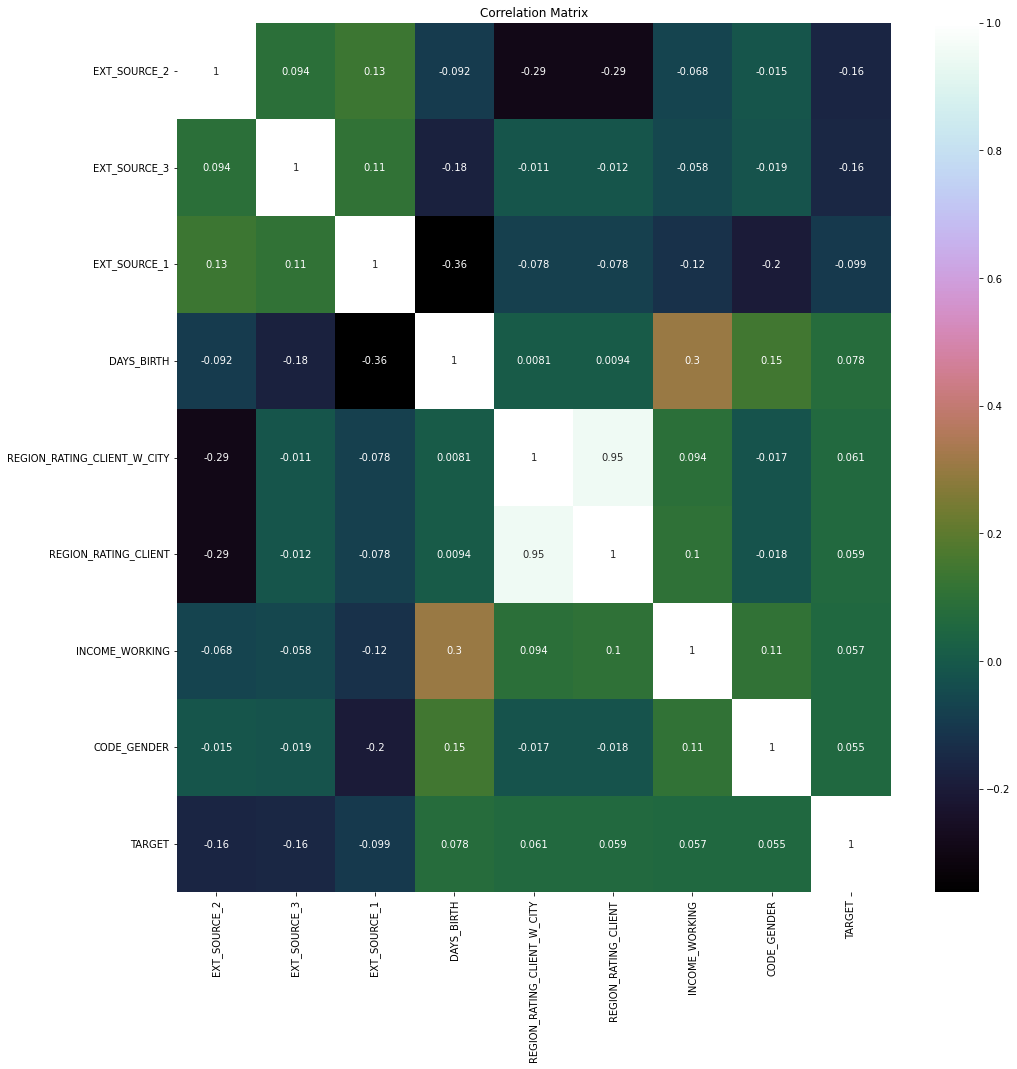

In [32]:
corr_variable = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'DAYS_BIRTH', 
                 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'INCOME_WORKING', 'CODE_GENDER', 
                'TARGET']

corr_df = df_train[corr_variable]

corr = corr_df.corr()

plt.figure(figsize = (16,16)
          )

plt.title("Correlation Matrix")

# heatmap useful for clustering
sns.heatmap(corr,
            annot = True,
            cmap = "cubehelix")

<a id="2"></a >
## Variables Visualization

The variables in the train dataset with high corrlation with the target variable are `EXT_SOURCE_2`, `EXT_SOURCE_3`, `EXT_SOURCE_1`, `DAYS_BIRTH`, `REGION_RATING_CLIENT_W_CITY`, `REGION_RATING_CLIENT`, `INCOME_WORKING`, `CODE_GENDER` respectively. We are going to perform data visualization about the independent variables. 

The varaibles of `DAYS_BIRTH` is numerical variable and the variables of `REGION_RATING_CLIENT_W_CITY`, `REGION_RATING_CLIENT` are ordinal categorical variable. Moreover, the variables of `CODE_GENDER` and `INCOME_WORKING` are binary categorical variable. 

In [33]:
corr_df.columns

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'DAYS_BIRTH',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'INCOME_WORKING',
       'CODE_GENDER', 'TARGET'],
      dtype='object')

<a id="2.1"></a >
### Numerical Variables 

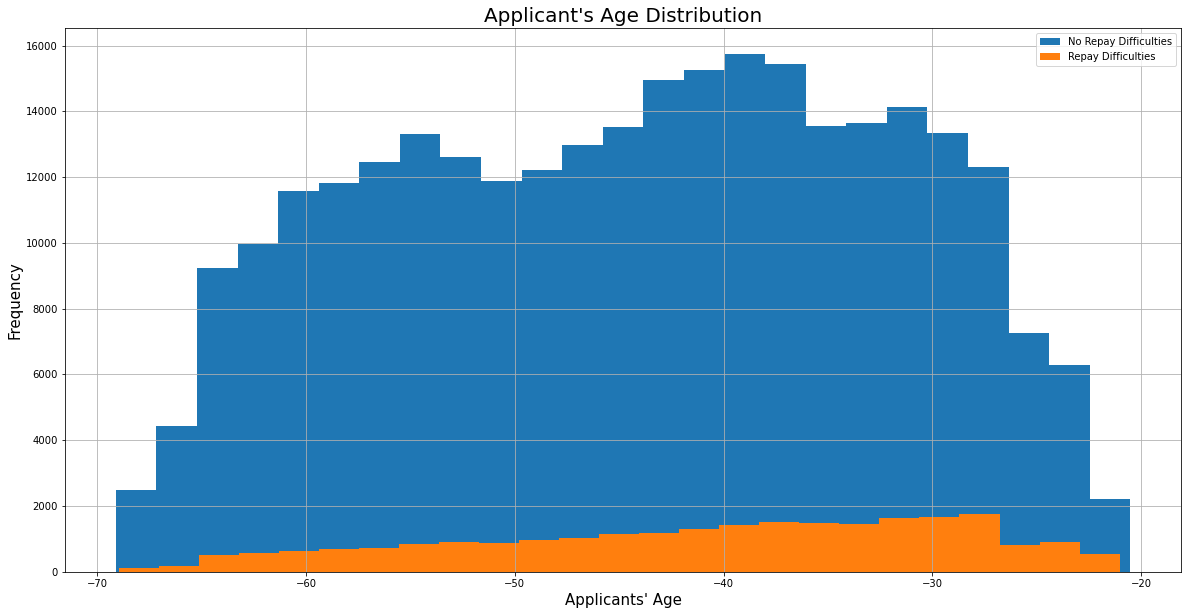

In [34]:
plt.figure(figsize = (20, 10))
corr_df['AGE'] = corr_df['DAYS_BIRTH'] / 365
corr_df['AGE'].groupby(corr_df['TARGET']).hist(bins = 25)
plt.legend(['No Repay Difficulties', 'Repay Difficulties'])
plt.xlabel("Applicants' Age", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title("Applicant's Age Distribution", fontsize = 20)
plt.show()

In [35]:
pd.DataFrame(corr_df['AGE'].describe())

,AGE
count,307511.000000
mean,-43.936973
std,11.956133
min,-69.120548
25%,-53.923288
50%,-43.150685
75%,-34.008219
max,-20.517808


<a id="2.2"></a >
### Categorical Variable 

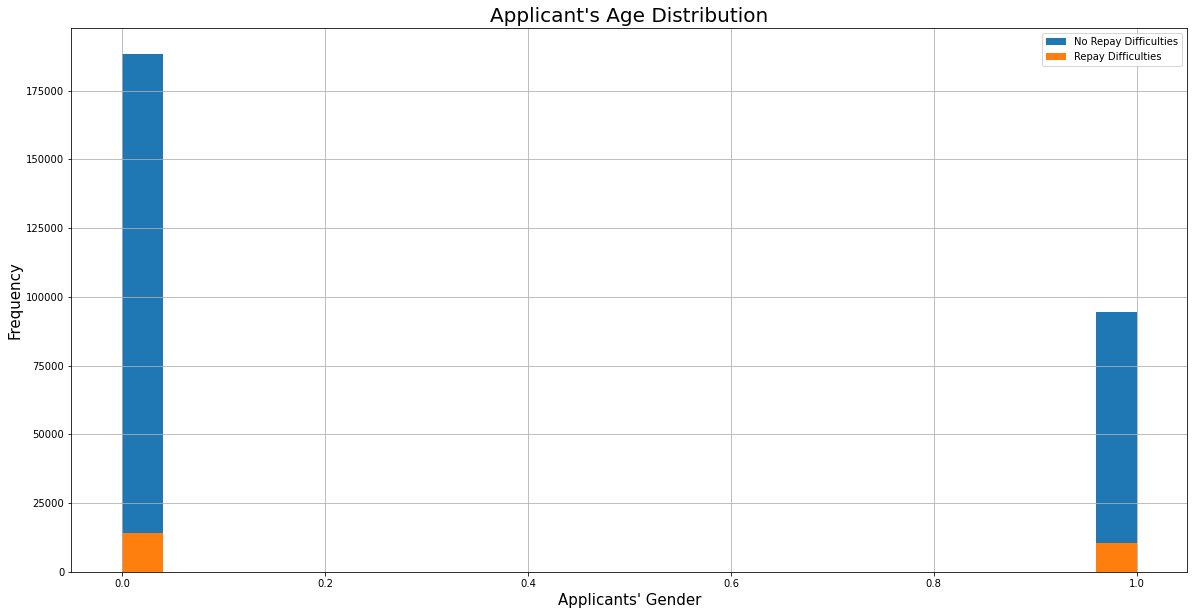

In [36]:
plt.figure(figsize = (20, 10))
df_train['CODE_GENDER'].groupby(corr_df['TARGET']).hist(bins = 25)
plt.legend(['No Repay Difficulties', 'Repay Difficulties'])
plt.xlabel("Applicants' Gender", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title("Applicant's Age Distribution", fontsize = 20)
plt.show()

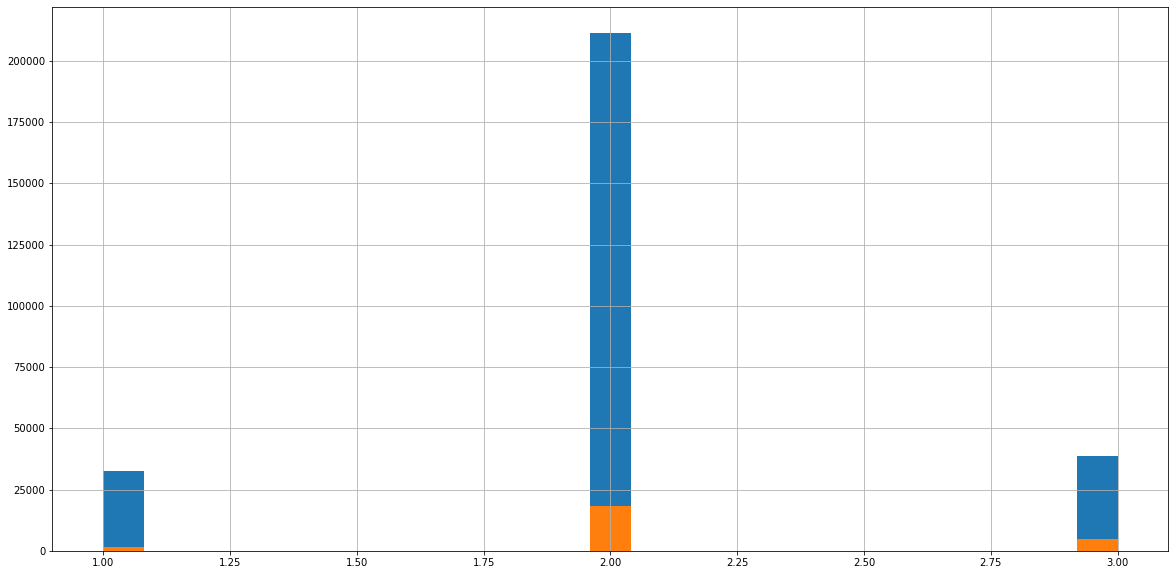

In [37]:
plt.figure(figsize = (20, 10))
corr_df['REGION_RATING_CLIENT_W_CITY'].groupby(df_train['TARGET']).hist(bins = 25)

plt.show()

<a id="4"></a >
## ML Algorithms - Original Dataset

### Logistic Regression Model 

In [38]:
def evaluation_metrics(y_test, y_pred):
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    roc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]
    Specificity = tn/(tn+fp)
    G_Mean = recall*Specificity
    print('precision is {},recall is {},f1 is {}, roc is {}, accuracy is {}, Specificity is {}, G_Mean is {}.'.format(precision,recall,f1,roc,accuracy,Specificity,G_Mean)) 
    return (precision,recall,f1,roc,accuracy,Specificity,G_Mean)

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


train, test = train_test_split(df_train, test_size = 0.2, 
                              random_state = 0)
y_train = train.iloc[:, 1]
y_test = test.iloc[:, 1]

X_train = train.iloc[:, 2:]
X_test = test.iloc[:, 2:]

LR = LogisticRegression(max_iter = 1000)
Lresult = LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)
Accuracy_LR = accuracy_score(y_test, y_pred)

In [40]:
print("Logistic Regression Accuracy:", Accuracy_LR)

Logistic Regression Accuracy: 0.9210607612636782


In [41]:
print(evaluation_metrics(y_test, y_pred))

precision is 0.8483529259396264,recall is 0.9210607612636782,f1 is 0.8832130071529627, roc is 0.5, accuracy is 0.9210607612636782, Specificity is 1.0, G_Mean is 0.9210607612636782.
(0.8483529259396264, 0.9210607612636782, 0.8832130071529627, 0.5, 0.9210607612636782, 1.0, 0.9210607612636782)


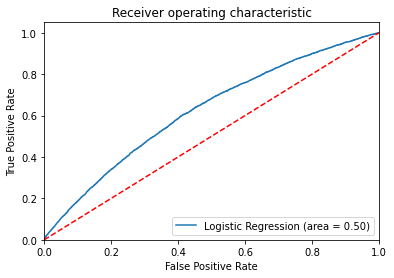

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
lr_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Random Forest Classification 

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RF_model = RandomForestClassifier(n_estimators=100, random_state=1, max_features="sqrt", max_depth=34)
RF_model.fit(X_train,y_train)

y_pred_RF = RF_model.predict(X_test)

Accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

RF Accuracy: 0.9211583174804481


In [44]:
print(evaluation_metrics(y_test, y_pred_RF))

precision is 0.9175201458432787,recall is 0.9211583174804481,f1 is 0.8834844779222066, roc is 0.5007120798452394, accuracy is 0.9211583174804481, Specificity is 0.9999823471261121, G_Mean is 0.9211420563888388.
(0.9175201458432787, 0.9211583174804481, 0.8834844779222066, 0.5007120798452394, 0.9211583174804481, 0.9999823471261121, 0.9211420563888388)


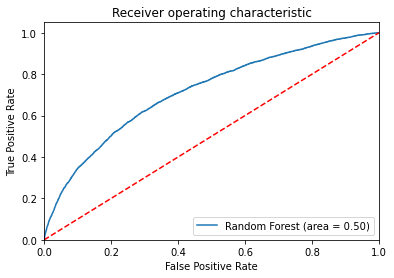

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
rf_roc_auc = roc_auc_score(y_test, y_pred_RF)
fpr, tpr, thresholds = roc_curve(y_test, RF_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label = 'Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Gradiant Boosting 

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


GB_model = GradientBoostingClassifier(n_estimators=100, random_state=1, max_features="sqrt", learning_rate=0.055, max_depth=24)
GB_model.fit(X_train, y_train)

y_pred_GB = GB_model.predict(X_test)
Accuracy_GB = accuracy_score(y_test, y_pred_GB)
print("GB Accuracy:",Accuracy_GB)

GB Accuracy: 0.9210932800026015


In [50]:
print(evaluation_metrics(y_test, y_pred_GB))

precision is 0.8912780590486838,recall is 0.9210932800026015,f1 is 0.8836415761092199, roc is 0.5012417351462428, accuracy is 0.9210932800026015, Specificity is 0.9998058183872335, G_Mean is 0.9209144206239822.
(0.8912780590486838, 0.9210932800026015, 0.8836415761092199, 0.5012417351462428, 0.9210932800026015, 0.9998058183872335, 0.9209144206239822)


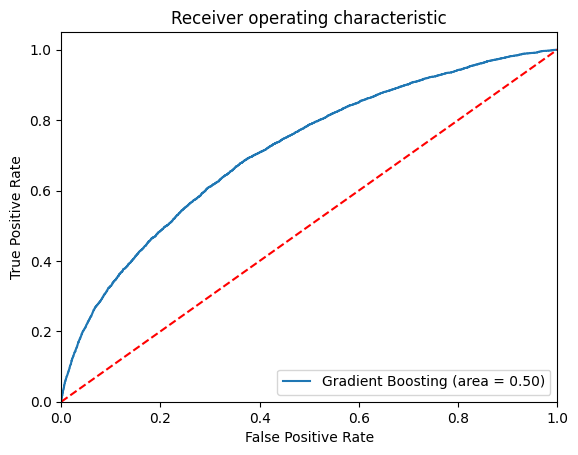

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
gb_roc_auc = roc_auc_score(y_test, y_pred_GB)
fpr, tpr, thresholds = roc_curve(y_test, GB_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label = 'Gradient Boosting (area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

### XGboost 

In [51]:
df_train_xgb = df.copy()

In [52]:
df_train_xgb['NAME_CONTRACT_TYPE'] = np.where(df['NAME_CONTRACT_TYPE'] == 'Cash loans', 1, 0)
df_train_xgb['CODE_GENDER'] = df_train_xgb['CODE_GENDER'].replace({'XNA':'F'})
df_train_xgb['CODE_GENDER'] = np.where(df['CODE_GENDER'] == 'M', 1, 0)
df_train_xgb['FLAG_OWN_CAR'] = np.where(df['FLAG_OWN_CAR'] == 'Y', 1, 0)
df_train_xgb['FLAG_OWN_REALTY'] = np.where(df['FLAG_OWN_REALTY'] == 'Y', 1, 0)

In [53]:
df_train_xgb['NAME_TYPE_SUITE'] = df_train_xgb['NAME_TYPE_SUITE'].fillna('Unaccompanied')
suite_df = pd.get_dummies(df_train_xgb['NAME_TYPE_SUITE'])

for i in df_train_xgb['NAME_TYPE_SUITE'].sort_values(ascending=True).unique()[1:]:
    df_train_xgb['TYPE_SUITE_' + str(i.replace(" ", "_").upper())] = suite_df[i]

df_train_xgb = df_train_xgb.drop(labels = 'NAME_TYPE_SUITE', axis = 1)

In [54]:
income_df = pd.get_dummies(df_train_xgb['NAME_INCOME_TYPE'])

for i in df_train_xgb['NAME_INCOME_TYPE'].sort_values(ascending=True).unique()[1:]:
    df_train_xgb['INCOME_' + str(i.replace(" ", "_").upper())] = income_df[i] 

df_train_xgb = df_train_xgb.drop(labels = 'NAME_INCOME_TYPE', axis = 1)

In [55]:
education_df = pd.get_dummies(df_train_xgb['NAME_EDUCATION_TYPE'])

for i in df_train_xgb['NAME_EDUCATION_TYPE'].sort_values(ascending = True).unique()[1:]:
    df_train_xgb['EDUCATION_' + str(i.replace(" ", '_').upper())] = education_df[i]

df_train_xgb = df_train_xgb.drop(labels = 'NAME_EDUCATION_TYPE', axis = 1)

In [56]:
df_train_xgb['NAME_FAMILY_STATUS'] = df_train_xgb['NAME_FAMILY_STATUS'].replace({'Unknown':'Married'})
family_df = pd.get_dummies(df_train_xgb['NAME_FAMILY_STATUS'])

for i in df_train_xgb['NAME_FAMILY_STATUS'].sort_values(ascending = True).unique()[1:]:
    df_train_xgb['FAMILY_' + str(i.replace(" ", '_').upper())] = family_df[i]

df_train_xgb = df_train_xgb.drop(labels = 'NAME_FAMILY_STATUS', axis = 1)

In [57]:
house_df = pd.get_dummies(df_train_xgb['NAME_HOUSING_TYPE'])

for i in df_train_xgb['NAME_HOUSING_TYPE'].sort_values(ascending=True).unique()[1:]:
    df_train_xgb['HOUSING_' + str(i.replace(" ", '_').upper())] = house_df[i]


df_train_xgb = df_train_xgb.drop(labels = 'NAME_HOUSING_TYPE', axis = 1)

In [58]:
df_train_xgb['OCCUPATION_TYPE'] = df_train_xgb['OCCUPATION_TYPE'].fillna('Laborers')
occupation_df = pd.get_dummies(df_train_xgb['OCCUPATION_TYPE'])

for i in df_train_xgb['OCCUPATION_TYPE'].sort_values(ascending = True).unique()[1:]:
    df_train_xgb['OCCUPATION_' + str(i.replace(' ', '_').upper())] = occupation_df[i]

df_train_xgb = df_train_xgb.drop(labels = 'OCCUPATION_TYPE', axis = 1)

In [59]:
df_train_xgb['ORGANIZATION_TYPE'] = df_train_xgb['ORGANIZATION_TYPE'].replace({'Business Entity Type 1':'Business Entity', 
                                     'Business Entity Type 2':'Business Entity', 
                                    'Business Entity Type 3':'Business Entity', 
                                    'Industry: type 1':'Industry', 
                                    'Industry: type 10':'Industry', 
                                    'Industry: type 11': 'Industry', 
                                    'Industry: type 12':'Industry', 
                                    'Industry: type 13': 'Industry', 
                                    'Industry: type 2' : 'Industry', 
                                    'Industry: type 3': 'Industry', 
                                    'Industry: type 4': 'Industry', 
                                    'Industry: type 5': 'Industry', 
                                    'Industry: type 6': 'Industry', 
                                    'Industry: type 7': 'Industry', 
                                    'Industry: type 8': 'Industry', 
                                    'Industry: type 9': 'Industry', 
                                    'Trade: type 1': 'Trade', 
                                    "Trade: type 2": 'Trade', 
                                    'Trade: type 3': 'Trade', 
                                    'Trade: type 4': 'Trade', 
                                    'Trade: type 5': 'Trade', 
                                    'Trade: type 6': 'Trade', 
                                    'Trade: type 7': 'Trade', 
                                    'Transport: type 1': 'Transport', 
                                    'Transport: type 2': 'Transport', 
                                    'Transport: type 3': 'Transport', 
                                    'Transport: type 4': 'Transport'})

df_train_xgb['ORGANIZATION_TYPE'] = df_train_xgb['ORGANIZATION_TYPE'].replace({"XNA":'Business Entity'})

In [60]:
organization_df = pd.get_dummies(df_train_xgb['ORGANIZATION_TYPE'])

for i in df_train_xgb['ORGANIZATION_TYPE'].sort_values(ascending=True).unique()[1:]:
    df_train_xgb['ORGANIZATION_' + str(i.strip().upper())] = organization_df[i]

df_train_xgb = df_train_xgb.drop(labels = 'ORGANIZATION_TYPE', axis = 1)

In [61]:
weekday_df = pd.get_dummies(df_train_xgb['WEEKDAY_APPR_PROCESS_START'])
for i in df_train_xgb['WEEKDAY_APPR_PROCESS_START'].sort_values(ascending=True).unique()[1:]:
    df_train_xgb['WEEKDAY_' + str(i.strip().upper())]  = weekday_df[i]
    
df_train_xgb.drop(labels = 'WEEKDAY_APPR_PROCESS_START', axis = 1, inplace=True)

In [62]:
df_train_xgb['FONDKAPREMONT_MODE'] = df_train_xgb['FONDKAPREMONT_MODE'].fillna('reg oper account')
FONDKAPREMONT_df = pd.get_dummies(df_train_xgb['FONDKAPREMONT_MODE'])

for i in df_train_xgb['FONDKAPREMONT_MODE'].sort_values(ascending = True).unique()[1:]:
    df_train_xgb['FONDKAPREMONT_' + str(i.replace(' ', '_').upper())] = FONDKAPREMONT_df[i]
    
df_train_xgb = df_train_xgb.drop(labels = 'FONDKAPREMONT_MODE', axis = 1)

In [63]:
df_train_xgb['HOUSETYPE_MODE'] = df_train_xgb['HOUSETYPE_MODE'].fillna('block of flats')
housetype_df = pd.get_dummies(df_train_xgb['HOUSETYPE_MODE'])

for i in df_train_xgb['HOUSETYPE_MODE'].sort_values(ascending = True).unique()[1:]:
    df_train_xgb['HOUSETYPE_' + str(i.replace(' ', '_').upper())] = housetype_df[i]

df_train_xgb = df_train_xgb.drop(labels = 'HOUSETYPE_MODE', axis = 1)

In [64]:
df_train_xgb['WALLSMATERIAL_MODE'] = df_train_xgb['WALLSMATERIAL_MODE'].fillna('Panel')

walls_df = pd.get_dummies(df_train_xgb['WALLSMATERIAL_MODE'])

for i in df_train_xgb['WALLSMATERIAL_MODE'].sort_values(ascending=True).unique()[1:]:
    df_train_xgb['WALLMATERIAL_' + str(i.replace(' ', "_").upper())] = walls_df[i]

df_train_xgb = df_train_xgb.drop(labels = 'WALLSMATERIAL_MODE', axis = 1)

In [65]:
df_train_xgb['EMERGENCYSTATE_MODE'] = df_train_xgb['EMERGENCYSTATE_MODE'].fillna('No')

emergency_df = pd.get_dummies(df_train_xgb['EMERGENCYSTATE_MODE'])

for i in df_train_xgb['EMERGENCYSTATE_MODE'].sort_values(ascending = True).unique()[1:]:
    df_train_xgb['EMERGENCYSTATE_' + str(i.upper())] = emergency_df[i]

df_train_xgb = df_train_xgb.drop(labels = 'EMERGENCYSTATE_MODE', axis = 1)

In [66]:
from xgboost.sklearn import XGBClassifier

In [67]:
train, test = train_test_split(df_train_xgb, test_size = 0.2, 
                              random_state = 0)
y_train = train.iloc[:, 1]
y_test = test.iloc[:, 1]

X_train = train.iloc[:, 2:]
X_test = test.iloc[:, 2:]

xgb = XGBClassifier(scale_pos_weight=11)
xgb.fit(X_train, y_train)

y_pred_XGB = xgb.predict(X_test)
Accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
print('XGBoost Accuracy:', Accuracy_XGB)

XGBoost Accuracy: 0.7351348714696844


In [68]:
print(evaluation_metrics(y_test, y_pred_XGB))

precision is 0.8958503773608903,recall is 0.7351348714696844,f1 is 0.7933331852065623, roc is 0.6814560577609305, accuracy is 0.7351348714696844, Specificity is 0.7451984183024997, G_Mean is 0.5478213434582202.
(0.8958503773608903, 0.7351348714696844, 0.7933331852065623, 0.6814560577609305, 0.7351348714696844, 0.7451984183024997, 0.5478213434582202)


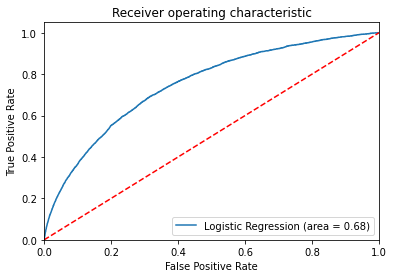

In [69]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
xg_roc_auc = roc_auc_score(y_test, y_pred_XGB)
fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % xg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### ANN

In [154]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [156]:
NNmodel = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(202,)),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=1,activation="sigmoid")
    ]
)
NNmodel.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
history = NNmodel.fit(X_train_sc,y_train,batch_size = 100,epochs = 100)

Epoch 1/100
2461/2461 [==============================] - 4s 833us/step - loss: 0.2806 - accuracy: 0.9188
Epoch 2/100
2461/2461 [==============================] - 2s 845us/step - loss: 0.2541 - accuracy: 0.9188
Epoch 3/100
2461/2461 [==============================] - 3s 1ms/step - loss: 0.2526 - accuracy: 0.9188
Epoch 4/100
2461/2461 [==============================] - 3s 1ms/step - loss: 0.2519 - accuracy: 0.9188
Epoch 5/100
2461/2461 [==============================] - 3s 1ms/step - loss: 0.2513 - accuracy: 0.9188
Epoch 6/100
2461/2461 [==============================] - 3s 1ms/step - loss: 0.2508 - accuracy: 0.9188
Epoch 7/100
2461/2461 [==============================] - 3s 1ms/step - loss: 0.2504 - accuracy: 0.9188
Epoch 8/100
2461/2461 [==============================] - 2s 1ms/step - loss: 0.2501 - accuracy: 0.9188
Epoch 9/100
2461/2461 [==============================] - 3s 1ms/step - loss: 0.2498 - accuracy: 0.9188
Epoch 10/100
2461/2461 [==============================] - 2s 998us/st

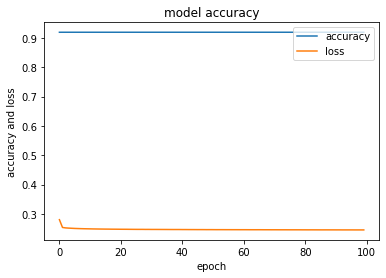

In [157]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

In [158]:
NN = NNmodel.predict(X_test_sc)
NN

1922/1922 [==============================] - 1s 488us/step


array([[0.26417997],
       [0.03661759],
       [0.14819477],
       ...,
       [0.03521039],
       [0.14759965],
       [0.08481758]], dtype=float32)

In [166]:
y_pred_NN = (NN > 0.08).astype(int) 
evaluation_metrics(y_test, y_pred_NN)

precision is 0.8952014483140035,recall is 0.6734630831016373,f1 is 0.7485132091073448, roc is 0.6696342226357912, accuracy is 0.6734630831016373, Specificity is 0.6741809066516029, G_Mean is 0.4540359519618456.


(0.8952014483140035,
 0.6734630831016373,
 0.7485132091073448,
 0.6696342226357912,
 0.6734630831016373,
 0.6741809066516029,
 0.4540359519618456)

<a id="5"></a >
## ML Algorithms - SMOTE 

In [46]:
df_train_SMOTE = df_train.copy()
train, test = train_test_split(df_train, test_size = 0.2, random_state = 1)

X_train_SMOTE = train.iloc[:, 2:]; y_train_SMOTE = train.iloc[:, 1].values
X_test_SMOTE = test.iloc[:, 2:]; y_test_SMOTE = test.iloc[:, 1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_SMOTE = sc.fit_transform(X_train_SMOTE)
X_test_SMOTE = sc.fit_transform(X_test_SMOTE)

In [47]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train_SMOTE == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_SMOTE == 0)))
 
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train_SMOTE, y_train_SMOTE)
 
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 19855
Before OverSampling, counts of label '0': 226153 

After OverSampling, the shape of train_X: (452306, 202)
After OverSampling, the shape of train_y: (452306,) 

After OverSampling, counts of label '1': 226153
After OverSampling, counts of label '0': 226153


### Logistic Regression 

In [48]:
LR = LogisticRegression(max_iter = 1000)
Lresult = LR.fit(X_train_res, y_train_res)

y_pred = LR.predict(X_test_SMOTE)
Accuracy_LR = accuracy_score(y_test_SMOTE, y_pred)

In [49]:
print("The accuracy for Logistic Regression is", Accuracy_LR)

The accuracy for Logistic Regression is 0.6979496935108856


In [50]:
print(evaluation_metrics(y_test_SMOTE, y_pred))

precision is 0.8945221014632736,recall is 0.6979496935108856,f1 is 0.7657915732245927, roc is 0.6797070431361808, accuracy is 0.6979496935108856, Specificity is 0.7014664001556613, G_Mean is 0.48958825899682806.
(0.8945221014632736, 0.6979496935108856, 0.7657915732245927, 0.6797070431361808, 0.6979496935108856, 0.7014664001556613, 0.48958825899682806)


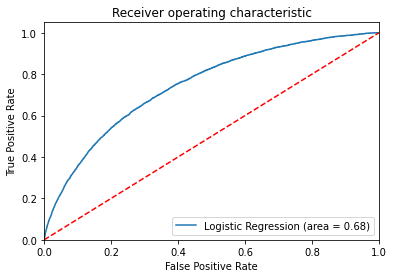

In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_smote = roc_auc_score(y_test_SMOTE, y_pred)
fpr, tpr, thresholds = roc_curve(y_test_SMOTE, LR.predict_proba(X_test_SMOTE)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_smote)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Random Forest 

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RF_model = RandomForestClassifier(n_estimators=100, random_state=1, max_features="sqrt", max_depth=34)
RF_model.fit(X_train_res,y_train_res)

y_pred_RF = RF_model.predict(X_test_SMOTE)

Accuracy_RF = accuracy_score(y_test_SMOTE, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

RF Accuracy: 0.248199274832122


In [82]:
print(evaluation_metrics(y_test_SMOTE, y_pred_RF))

precision is 0.891277167046607,recall is 0.248199274832122,f1 is 0.3045029766907194, roc is 0.5518718220916962, accuracy is 0.248199274832122, Specificity is 0.1896591371411388, G_Mean is 0.04707326030371663.
(0.891277167046607, 0.248199274832122, 0.3045029766907194, 0.5518718220916962, 0.248199274832122, 0.1896591371411388, 0.04707326030371663)


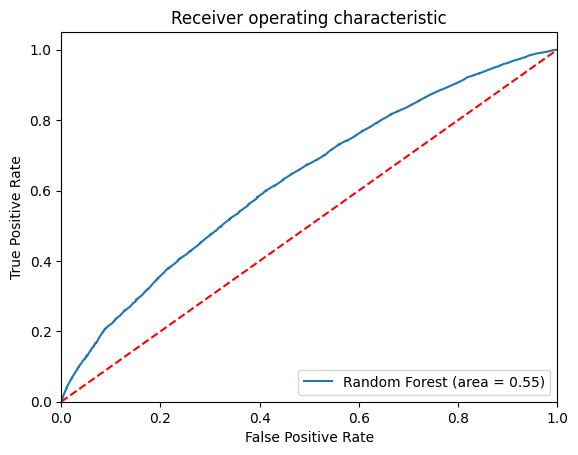

In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc_smote = roc_auc_score(y_test_SMOTE, y_pred_RF)
fpr, tpr, thresholds = roc_curve(y_test_SMOTE, RF_model.predict_proba(X_test_SMOTE)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc_smote)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

GB_model = GradientBoostingClassifier(n_estimators=100, random_state=1, max_features="sqrt", learning_rate=0.055, max_depth=24)
GB_model.fit(X_train_res, y_train_res)

y_pred_GB = GB_model.predict(X_test_SMOTE)
Accuracy_GB = accuracy_score(y_test_SMOTE, y_pred_GB)
print("GB Accuracy:",Accuracy_GB)

In [ ]:
print(evaluation_metrics(y_test_SMOTE, y_pred_GB))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gb_roc_auc_smote = roc_auc_score(y_test_SMOTE, y_pred_GB)
fpr, tpr, thresholds = roc_curve(y_test_SMOTE, GB_model.predict_proba(X_test_SMOTE)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc_smote)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### ANN

In [72]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
sc = StandardScaler()
X_train_res_sc = sc.fit_transform(X_train_res)
X_test_SMOTE_sc = sc.transform(X_test_SMOTE)

In [73]:
NNmodel_res = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(202,)),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=1,activation="sigmoid")
    ]
)
NNmodel_res.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
history_res = NNmodel_res.fit(X_train_res_sc ,y_train_res ,batch_size = 100,epochs = 100)

Epoch 1/100
4524/4524 [==============================] - 4s 805us/step - loss: 0.5811 - accuracy: 0.7016
Epoch 2/100
4524/4524 [==============================] - 4s 821us/step - loss: 0.5458 - accuracy: 0.7267
Epoch 3/100
4524/4524 [==============================] - 4s 849us/step - loss: 0.5313 - accuracy: 0.7383
Epoch 4/100
4524/4524 [==============================] - 4s 838us/step - loss: 0.5250 - accuracy: 0.7428
Epoch 5/100
4524/4524 [==============================] - 4s 846us/step - loss: 0.5213 - accuracy: 0.7463
Epoch 6/100
4524/4524 [==============================] - 4s 989us/step - loss: 0.5177 - accuracy: 0.7484
Epoch 7/100
4524/4524 [==============================] - 5s 1ms/step - loss: 0.5132 - accuracy: 0.7514
Epoch 8/100
4524/4524 [==============================] - 5s 1ms/step - loss: 0.5073 - accuracy: 0.7548
Epoch 9/100
4524/4524 [==============================] - 5s 1ms/step - loss: 0.5002 - accuracy: 0.7590
Epoch 10/100
4524/4524 [==============================] - 4s 

4524/4524 [==============================] - 5s 1ms/step - loss: 0.3921 - accuracy: 0.8125
Epoch 80/100
4524/4524 [==============================] - 5s 1ms/step - loss: 0.3915 - accuracy: 0.8126
Epoch 81/100
4524/4524 [==============================] - 5s 1ms/step - loss: 0.3916 - accuracy: 0.8120
Epoch 82/100
4524/4524 [==============================] - 5s 1ms/step - loss: 0.3915 - accuracy: 0.8123
Epoch 83/100
4524/4524 [==============================] - 5s 1ms/step - loss: 0.3914 - accuracy: 0.8124
Epoch 84/100
4524/4524 [==============================] - 5s 1ms/step - loss: 0.3912 - accuracy: 0.8128
Epoch 85/100
4524/4524 [==============================] - 5s 1ms/step - loss: 0.3909 - accuracy: 0.8127
Epoch 86/100
4524/4524 [==============================] - 5s 1ms/step - loss: 0.3909 - accuracy: 0.8127
Epoch 87/100
4524/4524 [==============================] - 5s 1ms/step - loss: 0.3910 - accuracy: 0.8130
Epoch 88/100
4524/4524 [==============================] - 5s 1ms/step - loss:

In [137]:
NN_res = NNmodel_res.predict(X_test_SMOTE_sc)

1922/1922 [==============================] - 1s 491us/step


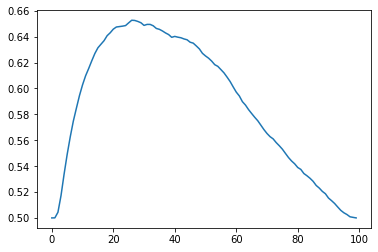

In [409]:
res_NN = []
for i in range(1,101):
    y_pred_res_NN = (NN_res > i/100).astype(int)
    res_NN.append(roc_auc_score(y_test_SMOTE, y_pred_res_NN))
plt.plot(res_NN)
plt.show()

In [167]:
y_pred_res_NN = (NN_res > 0.28).astype(int)

In [168]:
evaluation_metrics(y_test_SMOTE, y_pred_res_NN)

precision is 0.8910586397853254,recall is 0.6233354470513633,f1 is 0.7086472766965539, roc is 0.6525169768722893, accuracy is 0.6233354470513633, Specificity is 0.6177100100826066, G_Mean is 0.38504054528294374.


(0.8910586397853254,
 0.6233354470513633,
 0.7086472766965539,
 0.6525169768722893,
 0.6233354470513633,
 0.6177100100826066,
 0.38504054528294374)

### ML Algorithms - RandomOverSampling 

In [140]:
df_train_ROS = df_train.copy()
train, test = train_test_split(df_train, test_size = 0.2, random_state = 1)

X_train_ROS = train.iloc[:, 2:]; y_train_ROS = train.iloc[:, 1].values
X_test_ROS = test.iloc[:, 2:]; y_test_ROS = test.iloc[:, 1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_ROS = sc.fit_transform(X_train_ROS)
X_test_ROS = sc.fit_transform(X_test_ROS)

In [141]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
 
# import RandomOverSampler module from imblearn library
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train_ROS, y_train_ROS)
 
print('After OverSampling, the shape of train_X: {}'.format(X_train_ros.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ros.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_ros == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_ros == 0)))

Before OverSampling, counts of label '1': 19970
Before OverSampling, counts of label '0': 226038 

After OverSampling, the shape of train_X: (452306, 202)
After OverSampling, the shape of train_y: (452306,) 

After OverSampling, counts of label '1': 226153
After OverSampling, counts of label '0': 226153


### Logistic

In [142]:
LR = LogisticRegression(max_iter = 1000)
Lresult = LR.fit(X_train_ros, y_train_ros)

y_pred_LR = LR.predict(X_test_ROS)
Accuracy_LR = accuracy_score(y_test_ROS, y_pred_LR)

print("The accuracy for Logistic Regression is", Accuracy_LR)

The accuracy for Logistic Regression is 0.6897874900411362


In [145]:
evaluation_metrics(y_test_SMOTE, y_pred_LR)

precision is 0.896569489870166,recall is 0.6897874900411362,f1 is 0.7598564948052956, roc is 0.6863700252921132, accuracy is 0.6897874900411362, Specificity is 0.6904462880087736, G_Mean is 0.47626121201379135.


(0.896569489870166,
 0.6897874900411362,
 0.7598564948052956,
 0.6863700252921132,
 0.6897874900411362,
 0.6904462880087736,
 0.47626121201379135)

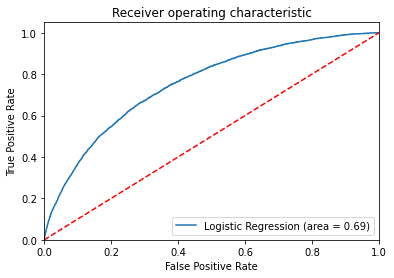

In [146]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lr_roc_auc_smote = roc_auc_score(y_test_SMOTE, y_pred_LR)
fpr, tpr, thresholds = roc_curve(y_test_SMOTE, LR.predict_proba(X_test_SMOTE)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc_smote)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Random Forest 

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RF_model = RandomForestClassifier(n_estimators=100, random_state=1, max_features="sqrt", max_depth=34)
RF_model.fit(X_train_ros,y_train_ros)

y_pred_RF = RF_model.predict(X_test_ROS)

Accuracy_RF = accuracy_score(y_test_ROS, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

RF Accuracy: 0.9154350194299465


In [148]:
print(evaluation_metrics(y_test_ROS, y_pred_RF))

precision is 0.8760862571711951,recall is 0.9154350194299465,f1 is 0.8858742375483882, roc is 0.5221813822100879, accuracy is 0.9154350194299465, Specificity is 0.9912440521465339, G_Mean is 0.9074195181365812.
(0.8760862571711951, 0.9154350194299465, 0.8858742375483882, 0.5221813822100879, 0.9154350194299465, 0.9912440521465339, 0.9074195181365812)


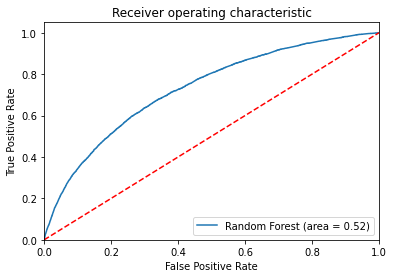

In [149]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc_ROS = roc_auc_score(y_test_ROS, y_pred_RF)
fpr, tpr, thresholds = roc_curve(y_test_ROS, RF_model.predict_proba(X_test_ROS)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc_ROS)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Gradient Boosting 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier(n_estimators=100, random_state=1, max_features="sqrt", learning_rate=0.055, max_depth=24)
GB_model.fit(X_train_ros, y_train_ros)

y_pred_GB = GB_model.predict(X_test_ROS)
Accuracy_GB = accuracy_score(y_test_ROS, y_pred_GB)
print("GB Accuracy:",Accuracy_GB)

In [ ]:
print(evaluation_metrics(y_test_ROS, y_pred_GB))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gb_roc_auc_ROS = roc_auc_score(y_test_ROS, y_pred_GB)
fpr, tpr, thresholds = roc_curve(y_test_ROS, GB_model.predict_proba(X_test_ROS)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc_ROS)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### ANN

In [169]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
sc = StandardScaler()
X_train_ros_sc = sc.fit_transform(X_train_ros)
X_test_ROS_sc = sc.transform(X_test_ROS)

In [170]:
NNmodel_ros = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(202,)),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=1,activation="sigmoid")
    ]
)
NNmodel_ros.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
history_ROS = NNmodel_ros.fit(X_train_ros_sc ,y_train_ros ,batch_size = 100,epochs = 100)

Epoch 1/100
4524/4524 [==============================] - 4s 763us/step - loss: 0.6107 - accuracy: 0.6729
Epoch 2/100
4524/4524 [==============================] - 3s 765us/step - loss: 0.5959 - accuracy: 0.6839
Epoch 3/100
4524/4524 [==============================] - 4s 781us/step - loss: 0.5912 - accuracy: 0.6881
Epoch 4/100
4524/4524 [==============================] - 4s 797us/step - loss: 0.5883 - accuracy: 0.6910
Epoch 5/100
4524/4524 [==============================] - 4s 807us/step - loss: 0.5862 - accuracy: 0.6921
Epoch 6/100
4524/4524 [==============================] - 4s 826us/step - loss: 0.5848 - accuracy: 0.6932
Epoch 7/100
4524/4524 [==============================] - 4s 823us/step - loss: 0.5836 - accuracy: 0.6937
Epoch 8/100
4524/4524 [==============================] - 4s 832us/step - loss: 0.5828 - accuracy: 0.6946
Epoch 9/100
4524/4524 [==============================] - 4s 845us/step - loss: 0.5822 - accuracy: 0.6948
Epoch 10/100
4524/4524 [==============================]

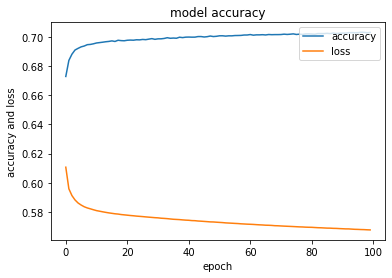

In [171]:
import matplotlib.pyplot as plt
plt.plot(history.history_ROS['accuracy'])
plt.plot(history.history_ROS['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

In [172]:
NN_ros = NNmodel_ros.predict(X_test_ROS_sc)

1922/1922 [==============================] - 1s 474us/step


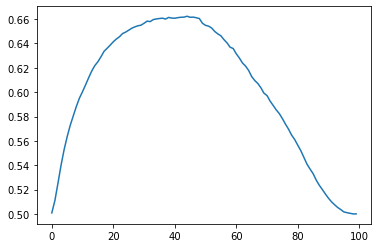

In [275]:
ros_NN = []
for i in range(1,101):
    y_pred_ros_NN = (NN_ADA > i/100).astype(int)
    ros_NN.append(roc_auc_score(y_test_ROS, y_pred_ros_NN))
plt.plot(ros_NN)
plt.show()

In [183]:
y_pred_ros_NN = (NN_ros > 0.51).astype(int)
evaluation_metrics(y_test_ROS, y_pred_ros_NN)

precision is 0.8925310638564266,recall is 0.6528624619937239,f1 is 0.7318215286920937, roc is 0.6638986716008288, accuracy is 0.6528624619937239, Specificity is 0.6507349689561849, G_Mean is 0.42484043393814436.


(0.8925310638564266,
 0.6528624619937239,
 0.7318215286920937,
 0.6638986716008288,
 0.6528624619937239,
 0.6507349689561849,
 0.42484043393814436)

<a id="6"></a >
## ML Algorithms - Adaptive Synthetic

In [184]:
df_train_AS = df_train.copy()
train, test = train_test_split(df_train, test_size = 0.2, random_state = 1)

X_train_AS = train.iloc[:, 2:]; y_train_AS = train.iloc[:, 1].values
X_test_AS = test.iloc[:, 2:]; y_test_AS = test.iloc[:, 1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_AS = sc.fit_transform(X_train_AS)
X_test_AS = sc.fit_transform(X_test_AS)

In [185]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
 
# import Adaptive Synthetic (ADASYN) module from imblearn library
from imblearn.over_sampling import ADASYN
ADA = ADASYN()
X_train_ADA, y_train_ADA = ADA.fit_resample(X_train_AS, y_train_AS)
 
print('After OverSampling, the shape of train_X: {}'.format(X_train_ADA.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ADA.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_ADA == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_ADA == 0)))

Before OverSampling, counts of label '1': 19970
Before OverSampling, counts of label '0': 226038 

After OverSampling, the shape of train_X: (454110, 202)
After OverSampling, the shape of train_y: (454110,) 

After OverSampling, counts of label '1': 227957
After OverSampling, counts of label '0': 226153


### Logistic Model 

In [186]:
LR = LogisticRegression(max_iter = 1000)
Lresult = LR.fit(X_train_ADA, y_train_ADA)

y_pred_LR = LR.predict(X_test_AS)
Accuracy_LR = accuracy_score(y_test_AS, y_pred_LR)

print("The accuracy for Logistic Regression is", Accuracy_LR)

The accuracy for Logistic Regression is 0.6912183145537616


In [187]:
print(evaluation_metrics(y_test_AS, y_pred_LR))

precision is 0.8948078019064626,recall is 0.6912183145537616,f1 is 0.7608461196628453, roc is 0.6797158341412812, accuracy is 0.6912183145537616, Specificity is 0.6934356924274317, G_Mean is 0.47931545057110997.
(0.8948078019064626, 0.6912183145537616, 0.7608461196628453, 0.6797158341412812, 0.6912183145537616, 0.6934356924274317, 0.47931545057110997)


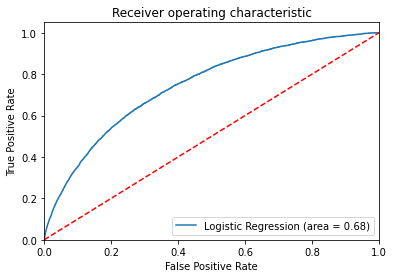

In [188]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lr_roc_auc_AS = roc_auc_score(y_test_AS, y_pred_LR)
fpr, tpr, thresholds = roc_curve(y_test_AS, LR.predict_proba(X_test_AS)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc_AS)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Random Forest

In [289]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RF_model = RandomForestClassifier(n_estimators=100, random_state=1, max_features="sqrt", max_depth=34)
RF_model.fit(X_train_ADA,y_train_ADA)

y_pred_RF = RF_model.predict(X_test_AS)

Accuracy_RF = accuracy_score(y_test_AS, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

RF Accuracy: 0.2282978066110596


In [190]:
print(evaluation_metrics(y_test_AS, y_pred_RF))

precision is 0.8931278389653676,recall is 0.2282978066110596,f1 is 0.27445018198232907, roc is 0.5477447103507964, accuracy is 0.2282978066110596, Specificity is 0.16671678488670333, G_Mean is 0.038061076314882224.
(0.8931278389653676, 0.2282978066110596, 0.27445018198232907, 0.5477447103507964, 0.2282978066110596, 0.16671678488670333, 0.038061076314882224)


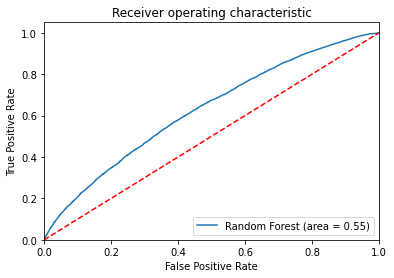

In [191]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc_AS = roc_auc_score(y_test_AS, y_pred_RF)
fpr, tpr, thresholds = roc_curve(y_test_AS, RF_model.predict_proba(X_test_AS)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc_AS)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Gradient Boosting 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier(n_estimators=100, random_state=1, max_features="sqrt", learning_rate=0.055, max_depth=24)
GB_model.fit(X_train_ADA, y_train_ADA)

y_pred_GB = GB_model.predict(X_test_AS)
Accuracy_GB = metrics.accuracy_score(y_test_AS, y_pred_GB)
print("GB Accuracy:",Accuracy_GB)

In [ ]:
print(evaluation_metrics(y_test_AS, y_pred_GB))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gb_roc_auc_as = roc_auc_score(y_test_AS, y_pred_GB)
fpr, tpr, thresholds = roc_curve(y_test_AS, GB_model.predict_proba(X_test_AS)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc_as)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### ANN

In [192]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
sc = StandardScaler()

In [408]:
NNmodel_ADA = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(202,)),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=1,activation="sigmoid")
    ]
)
NNmodel_ADA.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
history = NNmodel_ADA.fit(X_train_ADA ,y_train_ADA ,batch_size = 100,epochs = 100)

Epoch 1/100
4542/4542 [==============================] - 4s 804us/step - loss: 0.5869 - accuracy: 0.6953
Epoch 2/100
4542/4542 [==============================] - 4s 830us/step - loss: 0.5533 - accuracy: 0.7209
Epoch 3/100
4542/4542 [==============================] - 4s 906us/step - loss: 0.5394 - accuracy: 0.7311
Epoch 4/100
4542/4542 [==============================] - 4s 863us/step - loss: 0.5310 - accuracy: 0.7376
Epoch 5/100
4542/4542 [==============================] - 4s 849us/step - loss: 0.5253 - accuracy: 0.7423
Epoch 6/100
4542/4542 [==============================] - 4s 851us/step - loss: 0.5210 - accuracy: 0.7450
Epoch 7/100
4542/4542 [==============================] - 4s 857us/step - loss: 0.5180 - accuracy: 0.7467
Epoch 8/100
4542/4542 [==============================] - 4s 866us/step - loss: 0.5154 - accuracy: 0.7487
Epoch 9/100
4542/4542 [==============================] - 4s 878us/step - loss: 0.5135 - accuracy: 0.7503
Epoch 10/100
4542/4542 [==============================]

4542/4542 [==============================] - 5s 1ms/step - loss: 0.4520 - accuracy: 0.7805
Epoch 80/100
4542/4542 [==============================] - 5s 1ms/step - loss: 0.4519 - accuracy: 0.7813
Epoch 81/100
4542/4542 [==============================] - 5s 1ms/step - loss: 0.4517 - accuracy: 0.7807
Epoch 82/100
4542/4542 [==============================] - 5s 1ms/step - loss: 0.4514 - accuracy: 0.7812
Epoch 83/100
4542/4542 [==============================] - 5s 1ms/step - loss: 0.4515 - accuracy: 0.7810
Epoch 84/100
4542/4542 [==============================] - 5s 1ms/step - loss: 0.4513 - accuracy: 0.7811
Epoch 85/100
4542/4542 [==============================] - 5s 1ms/step - loss: 0.4511 - accuracy: 0.7811
Epoch 86/100
4542/4542 [==============================] - 5s 1ms/step - loss: 0.4510 - accuracy: 0.7812
Epoch 87/100
4542/4542 [==============================] - 5s 1ms/step - loss: 0.4509 - accuracy: 0.7818
Epoch 88/100
4542/4542 [==============================] - 5s 1ms/step - loss:

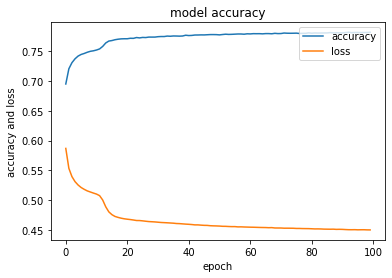

In [410]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

In [411]:
NN_ADA = NNmodel_ADA.predict(X_test_AS)
NN_ADA

1922/1922 [==============================] - 1s 495us/step


array([[0.46279994],
       [0.33197463],
       [0.18693757],
       ...,
       [0.8350815 ],
       [0.1527991 ],
       [0.39576766]], dtype=float32)

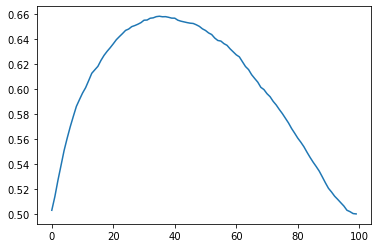

In [412]:
ADA_NN = []
for i in range(1,101):
    y_pred_ADA_NN = (NN_ADA > i/100).astype(int)
    ADA_NN.append(roc_auc_score(y_test_AS, y_pred_ADA_NN))
plt.plot(ADA_NN)
plt.show()

In [417]:
y_pred_ADA_NN = (NN_ADA > 0.38).astype(int)
evaluation_metrics(y_test_AS, y_pred_ADA_NN)

precision is 0.8907392658661143,recall is 0.6583093507633774,f1 is 0.7359964734995711, roc is 0.6581444159980491, accuracy is 0.6583093507633774, Specificity is 0.6583411458793978, G_Mean is 0.4333921323246843.


(0.8907392658661143,
 0.6583093507633774,
 0.7359964734995711,
 0.6581444159980491,
 0.6583093507633774,
 0.6583411458793978,
 0.4333921323246843)

## ML Algorithm - Borderline-1 SMOTE 

In [282]:
df_train_smb = df_train.copy()
train, test = train_test_split(df_train, test_size = 0.2, random_state = 1)

X_train_smb = train.iloc[:, 2:]; y_train_smb = train.iloc[:, 1].values
X_test_smb = test.iloc[:, 2:]; y_test_smb = test.iloc[:, 1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_smb = sc.fit_transform(X_train_smb)
X_test_smb = sc.fit_transform(X_test_smb)

In [283]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
 
# import SMOTE module from imblearn library
from imblearn.over_sampling import BorderlineSMOTE
BSMOTE = BorderlineSMOTE(random_state=2,kind="borderline-1")
X_train_smb, y_train_smb = BSMOTE.fit_resample(X_train_smb, y_train_smb)
 
print('After OverSampling, the shape of train_X: {}'.format(X_train_smb.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smb.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_smb == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smb == 0)))

Before OverSampling, counts of label '1': 19970
Before OverSampling, counts of label '0': 226038 

After OverSampling, the shape of train_X: (452306, 202)
After OverSampling, the shape of train_y: (452306,) 

After OverSampling, counts of label '1': 226153
After OverSampling, counts of label '0': 226153


### Logistic 

In [284]:
LR = LogisticRegression(max_iter = 1000)
Lresult = LR.fit(X_train_smb, y_train_smb)

y_pred_LR = LR.predict(X_test_smb)
Accuracy_LR = accuracy_score(y_test_smb, y_pred_LR)

print("The accuracy for Logistic Regression is", Accuracy_LR)

The accuracy for Logistic Regression is 0.7195421361559599


In [285]:
print(evaluation_metrics(y_test_smb, y_pred_LR))

precision is 0.8937603519776421,recall is 0.7195421361559599,f1 is 0.781379913041951, roc is 0.6797989732034859, accuracy is 0.7195421361559599, Specificity is 0.7272035802097889, G_Mean is 0.5232536175244135.
(0.8937603519776421, 0.7195421361559599, 0.781379913041951, 0.6797989732034859, 0.7195421361559599, 0.7272035802097889, 0.5232536175244135)


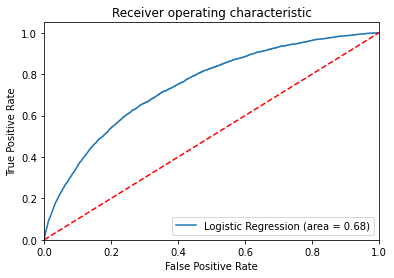

In [287]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lr_roc_auc_smb = roc_auc_score(y_test_smb, y_pred_LR)
fpr, tpr, thresholds = roc_curve(y_test_smb, LR.predict_proba(X_test_smb)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc_smb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Random Forest 

In [292]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RF_model = RandomForestClassifier(n_estimators=100, random_state=1, max_features="sqrt", max_depth=34)
RF_model.fit(X_train_smb, y_train_smb)

y_pred_RF = RF_model.predict(X_test_smb)

Accuracy_RF = accuracy_score(y_test_smb, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

RF Accuracy: 0.3151716176446677


In [293]:
print(evaluation_metrics(y_test_smb, y_pred_RF))

precision is 0.8902854749152426,recall is 0.3151716176446677,f1 is 0.3967407881307908, roc is 0.5703170627251739, accuracy is 0.3151716176446677, Specificity is 0.26598623812640404, G_Mean is 0.08383131294151855.
(0.8902854749152426, 0.3151716176446677, 0.3967407881307908, 0.5703170627251739, 0.3151716176446677, 0.26598623812640404, 0.08383131294151855)


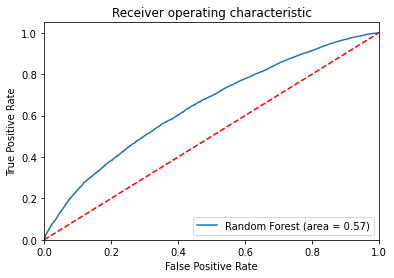

In [294]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc_smb = roc_auc_score(y_test_smb, y_pred_RF)
fpr, tpr, thresholds = roc_curve(y_test_smb, RF_model.predict_proba(X_test_smb)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc_smb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Gradient Boosting

In [295]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier(n_estimators=100, random_state=1, 
                                       max_features="sqrt", learning_rate=0.055, max_depth=24)
GB_model.fit(X_train_smb, y_train_smb)

y_pred_GB = GB_model.predict(X_test_smb)
Accuracy_GB = accuracy_score(y_test_smb, y_pred_GB)
print("GB Accuracy:",Accuracy_GB)

ImportError: cannot import name 'GradientBoostingClsmbsifier' from 'sklearn.ensemble' (C:\Users\24146\anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)

In [ ]:
print(evaluation_metrics(y_test_smb, y_pred_GB))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gb_roc_auc_smb = roc_auc_score(y_test_smb, y_pred_GB)
fpr, tpr, thresholds = roc_curve(y_test_smb, GB_model.predict_proba(X_test_smb)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc_smb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### ANN

In [296]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
sc = StandardScaler()

In [298]:
NNmodel_smb = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(202,)),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=1,activation="sigmoid")
    ]
)
NNmodel_smb.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
history_smb = NNmodel_smb.fit(X_train_smb ,y_train_smb ,batch_size = 100,epochs = 100)

Epoch 1/100
4524/4524 [==============================] - 5s 904us/step - loss: 0.5419 - accuracy: 0.7341
Epoch 2/100
4524/4524 [==============================] - 4s 882us/step - loss: 0.5109 - accuracy: 0.7532
Epoch 3/100
4524/4524 [==============================] - 4s 879us/step - loss: 0.4987 - accuracy: 0.7622
Epoch 4/100
4524/4524 [==============================] - 4s 872us/step - loss: 0.4920 - accuracy: 0.7659
Epoch 5/100
4524/4524 [==============================] - 4s 877us/step - loss: 0.4878 - accuracy: 0.7694
Epoch 6/100
4524/4524 [==============================] - 4s 882us/step - loss: 0.4849 - accuracy: 0.7710
Epoch 7/100
4524/4524 [==============================] - 4s 924us/step - loss: 0.4829 - accuracy: 0.7721
Epoch 8/100
4524/4524 [==============================] - 5s 1ms/step - loss: 0.4812 - accuracy: 0.7735
Epoch 9/100
4524/4524 [==============================] - 5s 1ms/step - loss: 0.4801 - accuracy: 0.7742
Epoch 10/100
4524/4524 [==============================] - 5

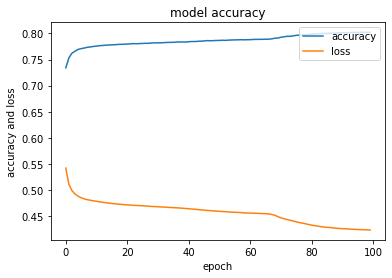

In [300]:
import matplotlib.pyplot as plt
plt.plot(history_smb.history['accuracy'])
plt.plot(history_smb.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

In [301]:
NN_smb = NNmodel_smb.predict(X_test)

1922/1922 [==============================] - 1s 506us/step


In [303]:
NN_smb

array([[0.00956542],
       [0.00956542],
       [0.00898037],
       ...,
       [0.36815006],
       [0.00956542],
       [0.00844315]], dtype=float32)

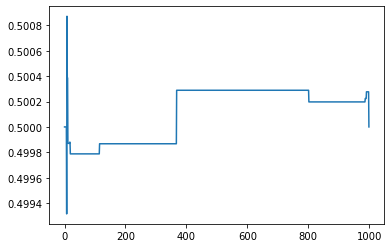

In [308]:
smb_NN = []
for i in range(1,1001):
    y_pred_smb_NN = (NN_smb > i/1000).astype(int)
    smb_NN.append(roc_auc_score(y_test_smb, y_pred_smb_NN))
plt.plot(smb_NN)
plt.show()

In [313]:
y_pred_smb_NN = (NN_smb > 0.009).astype(int)
evaluation_metrics(y_test_smb, y_pred_smb_NN)

precision is 0.8517484726904547,recall is 0.42687348584621887,f1 is 0.5350969327521461, roc is 0.500871686881055, accuracy is 0.42687348584621887, Specificity is 0.4126085649089912, G_Mean is 0.17613165639270695.


(0.8517484726904547,
 0.42687348584621887,
 0.5350969327521461,
 0.500871686881055,
 0.42687348584621887,
 0.4126085649089912,
 0.17613165639270695)

## ML Algorithm - NearMiss 

In [327]:
df_train_miss = df_train.copy()
train, test = train_test_split(df_train, test_size = 0.2, random_state = 1)

X_train_miss = train.iloc[:, 2:]; y_train_miss = train.iloc[:, 1].values
X_test_miss = test.iloc[:, 2:]; y_test_miss = test.iloc[:, 1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_miss = sc.fit_transform(X_train_miss)
X_test_miss = sc.fit_transform(X_test_miss)

In [328]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
 
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
 
X_train_miss, y_train_miss = nr.fit_resample(X_train_miss, y_train_miss)
 
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
 
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 19970
Before Undersampling, counts of label '0': 226038 

After Undersampling, the shape of train_X: (39940, 202)
After Undersampling, the shape of train_y: (39940,) 

After Undersampling, counts of label '1': 19970
After Undersampling, counts of label '0': 19970


### Logistic 

In [329]:
LR = LogisticRegression(max_iter = 1000)
Lresult = LR.fit(X_train_miss, y_train_miss)

y_pred_LR = LR.predict(X_test_miss)
Accuracy_LR = accuracy_score(y_test_miss, y_pred_LR)

print("The accuracy for Logistic Regression is", Accuracy_LR)

The accuracy for Logistic Regression is 0.5206250101621059


In [330]:
print(evaluation_metrics(y_test_miss, y_pred_LR))

precision is 0.8671955345531799,recall is 0.5206250101621058,f1 is 0.6233932847921934, roc is 0.5535201159729324, accuracy is 0.5206250101621059, Specificity is 0.5142836927104523, G_Mean is 0.2677489527435845.
(0.8671955345531799, 0.5206250101621058, 0.6233932847921934, 0.5535201159729324, 0.5206250101621059, 0.5142836927104523, 0.2677489527435845)


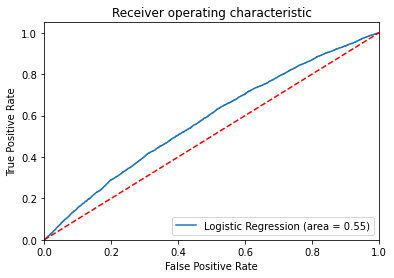

In [332]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lr_roc_auc_miss = roc_auc_score(y_test_miss, y_pred_LR)
fpr, tpr, thresholds = roc_curve(y_test_miss, LR.predict_proba(X_test_miss)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc_miss)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Random Forest 

In [334]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RF_model = RandomForestClassifier(n_estimators=100, random_state=1, max_features="sqrt", max_depth=34)
RF_model.fit(X_train_miss, y_train_miss)

y_pred_RF = RF_model.predict(X_test_miss)

Accuracy_RF = accuracy_score(y_test_miss, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

RF Accuracy: 0.16799180527779134


In [335]:
print(evaluation_metrics(y_test_miss, y_pred_RF))

precision is 0.8868446780452971,recall is 0.16799180527779134,f1 is 0.1779355666814362, roc is 0.5244838211872548, accuracy is 0.16799180527779134, Specificity is 0.09926945323970071, G_Mean is 0.016676454658676614.
(0.8868446780452971, 0.16799180527779134, 0.1779355666814362, 0.5244838211872548, 0.16799180527779134, 0.09926945323970071, 0.016676454658676614)


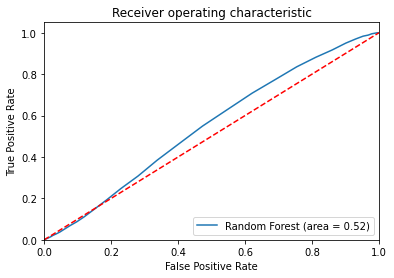

In [336]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc_miss = roc_auc_score(y_test_miss, y_pred_RF)
fpr, tpr, thresholds = roc_curve(y_test_miss, RF_model.predict_proba(X_test_miss)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc_miss)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClmisssifier

GB_model = GradientBoostingClmisssifier(n_estimators=100, random_state=1, 
                                       max_features="sqrt", learning_rate=0.055, max_depth=24)
GB_model.fit(X_train_miss, y_train_miss)

y_pred_GB = GB_model.predict(X_test_miss)
Accuracy_GB = metrics.accuracy_score(y_test_miss, y_pred_GB)
print("GB Accuracy:",Accuracy_GB)

In [ ]:
print(evaluation_metrics(y_test_miss, y_pred_GB))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gb_roc_auc_miss = roc_auc_score(y_test_miss, y_pred_GB)
fpr, tpr, thresholds = roc_curve(y_test_miss, GB_model.predict_proba(X_test_miss)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc_miss)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### ANN

In [337]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
sc = StandardScaler()
X_train_miss_sc = sc.fit_transform(X_train_miss)
X_test_miss_sc = sc.transform(X_test_miss)

In [340]:
NNmodel_miss = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(202,)),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=1,activation="sigmoid")
    ]
)
NNmodel_miss.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
history_miss = NNmodel_miss.fit(X_train_miss_sc ,y_train_miss ,batch_size = 100,epochs = 100)

Epoch 1/100
400/400 [==============================] - 1s 807us/step - loss: 0.7069 - accuracy: 0.5595
Epoch 2/100
400/400 [==============================] - 0s 838us/step - loss: 0.6186 - accuracy: 0.7120
Epoch 3/100
400/400 [==============================] - 0s 795us/step - loss: 0.5610 - accuracy: 0.7288
Epoch 4/100
400/400 [==============================] - 0s 791us/step - loss: 0.5460 - accuracy: 0.7344
Epoch 5/100
400/400 [==============================] - 0s 801us/step - loss: 0.5403 - accuracy: 0.7366
Epoch 6/100
400/400 [==============================] - 0s 818us/step - loss: 0.5366 - accuracy: 0.7375
Epoch 7/100
400/400 [==============================] - 0s 831us/step - loss: 0.5334 - accuracy: 0.7387
Epoch 8/100
400/400 [==============================] - 0s 800us/step - loss: 0.5302 - accuracy: 0.7400
Epoch 9/100
400/400 [==============================] - 0s 816us/step - loss: 0.5274 - accuracy: 0.7411
Epoch 10/100
400/400 [==============================] - 0s 811us/step - l

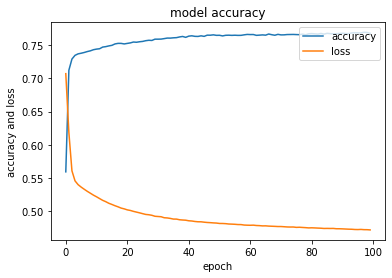

In [342]:
import matplotlib.pyplot as plt
plt.plot(history_miss.history['accuracy'])
plt.plot(history_miss.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

In [343]:
NN_miss = NNmodel_miss.predict(X_test_sc)

1922/1922 [==============================] - 1s 497us/step


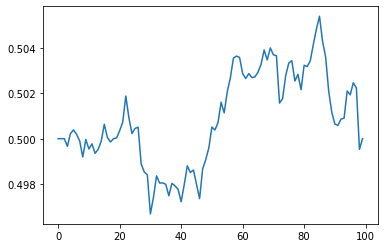

In [345]:
miss_NN = []
for i in range(1,101):
    y_pred_miss_NN = (NN_miss > i/100).astype(int)
    miss_NN.append(roc_auc_score(y_test_miss, y_pred_miss_NN))
plt.plot(miss_NN)
plt.show()

In [361]:
y_pred_miss_NN = (NN_miss > 0.86).astype(int)

In [362]:
evaluation_metrics(y_test_miss, y_pred_miss_NN)

precision is 0.8526784648712281,recall is 0.7384680422093232,f1 is 0.7878787639081415, roc is 0.5053825153172588, accuracy is 0.7384680422093232, Specificity is 0.7834008455238534, G_Mean is 0.5785164886591284.


(0.8526784648712281,
 0.7384680422093232,
 0.7878787639081415,
 0.5053825153172588,
 0.7384680422093232,
 0.7834008455238534,
 0.5785164886591284)

## ML Algorithm - RandomUnderSampling 

In [363]:
df_train_us = df_train.copy()
train, test = train_test_split(df_train, test_size = 0.2, random_state = 1)

X_train_us = train.iloc[:, 2:]; y_train_us = train.iloc[:, 1].values
X_test_us = test.iloc[:, 2:]; y_test_us = test.iloc[:, 1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_us = sc.fit_transform(X_train_us)
X_test_us = sc.fit_transform(X_test_us)

In [364]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
 
# apply RandomUnderSampling
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
 
X_train_us, y_train_us = undersample.fit_resample(X_train_us, y_train_us)
 
print('After Undersampling, the shape of train_X: {}'.format(X_train_us.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_us.shape))
 
print("After Undersampling, counts of label '1': {}".format(sum(y_train_us == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_us == 0)))

Before Undersampling, counts of label '1': 19970
Before Undersampling, counts of label '0': 226038 

After Undersampling, the shape of train_X: (39940, 202)
After Undersampling, the shape of train_y: (39940,) 

After Undersampling, counts of label '1': 19970
After Undersampling, counts of label '0': 19970


### Logistic 

In [365]:
LR = LogisticRegression(max_iter = 1000)
Lresult = LR.fit(X_train_us, y_train_us)

y_pred_LR = LR.predict(X_test_us)
Accuracy_LR = accuracy_score(y_test_us, y_pred_LR)

print("The accuracy for Logistic Regression is", Accuracy_LR)

The accuracy for Logistic Regression is 0.45680698502512074


In [366]:
print(evaluation_metrics(y_test_us, y_pred_LR))

precision is 0.8698321432668934,recall is 0.45680698502512074,f1 is 0.5623552115834615, roc is 0.5542249410353121, accuracy is 0.45680698502512074, Specificity is 0.43802734685935646, G_Mean is 0.20009395167737543.
(0.8698321432668934, 0.45680698502512074, 0.5623552115834615, 0.5542249410353121, 0.45680698502512074, 0.43802734685935646, 0.20009395167737543)


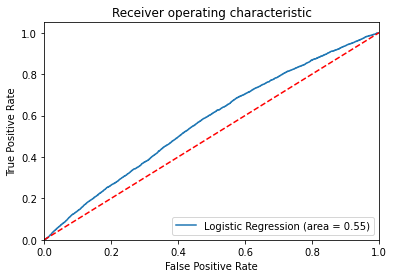

In [368]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lr_roc_auc_us = roc_auc_score(y_test_us, y_pred_LR)
fpr, tpr, thresholds = roc_curve(y_test_us, LR.predict_proba(X_test_us)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc_us)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Random Forest 

In [370]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RF_model = RandomForestClassifier(n_estimators=100, random_state=1, max_features="sqrt", max_depth=34)
RF_model.fit(X_train_us, y_train_us)

y_pred_RF = RF_model.predict(X_test_us)

Accuracy_RF = accuracy_score(y_test_us, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

RF Accuracy: 0.5096499357754907


In [371]:
print(evaluation_metrics(y_test_us, y_pred_RF))

precision is 0.8694330239185911,recall is 0.5096499357754907,f1 is 0.6131297166282891, roc is 0.5595706106520432, accuracy is 0.5096499357754907, Specificity is 0.5000265331753135, G_Mean is 0.2548384905188398.
(0.8694330239185911, 0.5096499357754907, 0.6131297166282891, 0.5595706106520432, 0.5096499357754907, 0.5000265331753135, 0.2548384905188398)


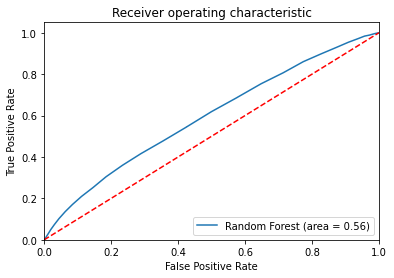

In [372]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc_us = roc_auc_score(y_test_us, y_pred_RF)
fpr, tpr, thresholds = roc_curve(y_test_us, RF_model.predict_proba(X_test_us)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc_us)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Gradient Boosting 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier(n_estimators=100, random_state=1, 
                                       max_features="sqrt", learning_rate=0.055, max_depth=24)
GB_model.fit(X_train_us, y_train_us)

y_pred_GB = GB_model.predict(X_test_us)
Accuracy_GB = accuracy_score(y_test_us, y_pred_GB)
print("GB Accuracy:",Accuracy_GB)

In [ ]:
print(evaluation_metrics(y_test_us, y_pred_GB))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gb_roc_auc_us = roc_auc_score(y_test_us, y_pred_GB)
fpr, tpr, thresholds = roc_curve(y_test_us, GB_model.predict_proba(X_test_us)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc_us)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### ANN

In [373]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
sc = StandardScaler()
X_train_us_sc = sc.fit_transform(X_train_us)
X_test_us_sc = sc.transform(X_test_us)

In [375]:
NNmodel_us = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(202,)),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=1,activation="sigmoid")
    ]
)
NNmodel_us.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
history_us = NNmodel_us.fit(X_train_us_sc ,y_train_us ,batch_size = 100,epochs = 100)

Epoch 1/100
400/400 [==============================] - 1s 820us/step - loss: 0.6726 - accuracy: 0.6039
Epoch 2/100
400/400 [==============================] - 0s 842us/step - loss: 0.6163 - accuracy: 0.6718
Epoch 3/100
400/400 [==============================] - 0s 863us/step - loss: 0.6036 - accuracy: 0.6804
Epoch 4/100
400/400 [==============================] - 0s 815us/step - loss: 0.6016 - accuracy: 0.6817
Epoch 5/100
400/400 [==============================] - 0s 812us/step - loss: 0.6003 - accuracy: 0.6825
Epoch 6/100
400/400 [==============================] - 0s 810us/step - loss: 0.5991 - accuracy: 0.6826
Epoch 7/100
400/400 [==============================] - 0s 818us/step - loss: 0.5982 - accuracy: 0.6822
Epoch 8/100
400/400 [==============================] - 0s 804us/step - loss: 0.5973 - accuracy: 0.6838
Epoch 9/100
400/400 [==============================] - 0s 826us/step - loss: 0.5963 - accuracy: 0.6850
Epoch 10/100
400/400 [==============================] - 0s 817us/step - l

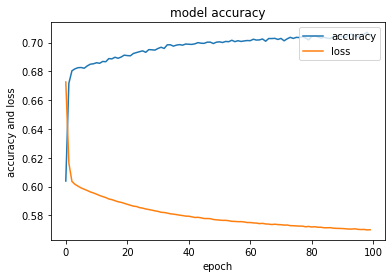

In [376]:
import matplotlib.pyplot as plt
plt.plot(history_us.history['accuracy'])
plt.plot(history_us.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

In [377]:
NN_us = NNmodel_us.predict(X_test_sc)

1922/1922 [==============================] - 1s 467us/step


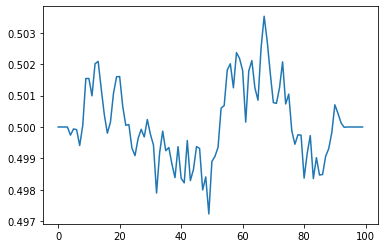

In [378]:
us_NN = []
for i in range(1,101):
    y_pred_us_NN = (NN_us > i/100).astype(int)
    us_NN.append(roc_auc_score(y_test_us, y_pred_us_NN))
plt.plot(us_NN)
plt.show()

In [387]:
y_pred_us_NN = (NN_us > 0.68).astype(int)
evaluation_metrics(y_test_us, y_pred_us_NN)

precision is 0.8522600685283217,recall is 0.6891696340015934,f1 is 0.7556919199791732, roc is 0.5035248300159508, accuracy is 0.6891696340015934, Specificity is 0.7249571046999098, G_Mean is 0.4996184225128916.


(0.8522600685283217,
 0.6891696340015934,
 0.7556919199791732,
 0.5035248300159508,
 0.6891696340015934,
 0.7249571046999098,
 0.4996184225128916)

## ML Algorithm - NeighbourhoodCleaningRule 

In [388]:
df_train_ncr = df_train.copy()
train, test = train_test_split(df_train, test_size = 0.2, random_state = 1)

X_train_ncr = train.iloc[:, 2:]; y_train_ncr = train.iloc[:, 1].values
X_test_ncr = test.iloc[:, 2:]; y_test_ncr = test.iloc[:, 1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_ncr = sc.fit_transform(X_train_ncr)
X_test_ncr = sc.fit_transform(X_test_ncr)

In [389]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
 
# apply NeighbourhoodCleaningRule UnderSampling
from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule()
 
X_train_ncr, y_train_ncr = ncr.fit_resample(X_train_ncr, y_train_ncr)
 
print('After Undersampling, the shape of train_X: {}'.format(X_train_ncr.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_ncr.shape))
 
print("After Undersampling, counts of label '1': {}".format(sum(y_train_ncr == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_ncr == 0)))

Before Undersampling, counts of label '1': 19970
Before Undersampling, counts of label '0': 226038 

After Undersampling, the shape of train_X: (199432, 202)
After Undersampling, the shape of train_y: (199432,) 

After Undersampling, counts of label '1': 19970
After Undersampling, counts of label '0': 179462


### Logistic 

In [390]:
LR = LogisticRegression(max_iter = 1000)
Lresult = LR.fit(X_train_ncr, y_train_ncr)

y_pred_LR = LR.predict(X_test_ncr)
Accuracy_LR = accuracy_score(y_test_ncr, y_pred_LR)

print("The accuracy for Logistic Regression is", Accuracy_LR)

The accuracy for Logistic Regression is 0.4896509113376583


In [391]:
print(evaluation_metrics(y_test_ncr, y_pred_LR))

precision is 0.8732255366629319,recall is 0.4896509113376583,f1 is 0.5938946438244129, roc is 0.5686955209046007, accuracy is 0.4896509113376583, Specificity is 0.47441317460598237, G_Mean is 0.23229684329641087.
(0.8732255366629319, 0.4896509113376583, 0.5938946438244129, 0.5686955209046007, 0.4896509113376583, 0.47441317460598237, 0.23229684329641087)


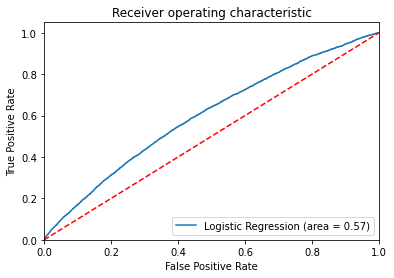

In [392]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lr_roc_auc_ncr = roc_auc_score(y_test_ncr, y_pred_LR)
fpr, tpr, thresholds = roc_curve(y_test_ncr, LR.predict_proba(X_test_ncr)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc_ncr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Random Forest 

In [393]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RF_model = RandomForestClassifier(n_estimators=100, random_state=1, max_features="sqrt", max_depth=34)
RF_model.fit(X_train_ncr, y_train_ncr)

y_pred_RF = RF_model.predict(X_test_ncr)

Accuracy_RF = accuracy_score(y_test_ncr, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

RF Accuracy: 0.7806448465928492


In [394]:
print(evaluation_metrics(y_test_ncr, y_pred_RF))

precision is 0.8559578644278251,recall is 0.7806448465928492,f1 is 0.8144977313453273, roc is 0.5192407038057328, accuracy is 0.7806448465928492, Specificity is 0.8310367396034175, G_Mean is 0.6487445481007313.
(0.8559578644278251, 0.7806448465928492, 0.8144977313453273, 0.5192407038057328, 0.7806448465928492, 0.8310367396034175, 0.6487445481007313)


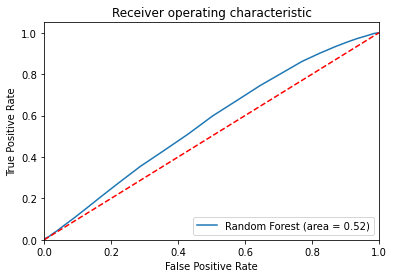

In [395]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc_ncr = roc_auc_score(y_test_ncr, y_pred_RF)
fpr, tpr, thresholds = roc_curve(y_test_ncr, RF_model.predict_proba(X_test_ncr)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc_ncr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Gradient Boosting 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier(n_estimators=100, random_state=1, 
                                       max_features="sqrt", learning_rate=0.055, max_depth=24)
GB_model.fit(X_train_ncr, y_train_ncr)

y_pred_GB = GB_model.predict(X_test_ncr)
Accuracy_GB = accuracy_score(y_test_ncr, y_pred_GB)
print("GB Accuracy:",Accuracy_GB)

In [ ]:
print(evaluation_metrics(y_test_ncr, y_pred_GB))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gb_roc_auc_ncr = roc_auc_score(y_test_ncr, y_pred_GB)
fpr, tpr, thresholds = roc_curve(y_test_ncr, GB_model.predict_proba(X_test_ncr)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc_ncr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### ANN

In [396]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
sc = StandardScaler()
X_train_ncr_sc = sc.fit_transform(X_train_ncr)
X_test_ncr_sc = sc.transform(X_test_ncr)

In [398]:
NNmodel_ncr = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(202,)),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=8,activation="sigmoid"),
        tf.keras.layers.Dense(units=1,activation="sigmoid")
    ]
)
NNmodel_ncr.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
history_ncr = NNmodel_ncr.fit(X_train_ncr_sc ,y_train_ncr ,batch_size = 100,epochs = 100)

Epoch 1/100
1995/1995 [==============================] - 2s 818us/step - loss: 0.3152 - accuracy: 0.8999
Epoch 2/100
1995/1995 [==============================] - 2s 838us/step - loss: 0.2891 - accuracy: 0.8999
Epoch 3/100
1995/1995 [==============================] - 2s 836us/step - loss: 0.2871 - accuracy: 0.8999
Epoch 4/100
1995/1995 [==============================] - 2s 840us/step - loss: 0.2858 - accuracy: 0.8999
Epoch 5/100
1995/1995 [==============================] - 2s 836us/step - loss: 0.2849 - accuracy: 0.8999
Epoch 6/100
1995/1995 [==============================] - 2s 859us/step - loss: 0.2843 - accuracy: 0.8999
Epoch 7/100
1995/1995 [==============================] - 2s 862us/step - loss: 0.2837 - accuracy: 0.8999
Epoch 8/100
1995/1995 [==============================] - 2s 868us/step - loss: 0.2832 - accuracy: 0.8999
Epoch 9/100
1995/1995 [==============================] - 2s 863us/step - loss: 0.2827 - accuracy: 0.8999
Epoch 10/100
1995/1995 [==============================]

1995/1995 [==============================] - 2s 1ms/step - loss: 0.2777 - accuracy: 0.9008
Epoch 80/100
1995/1995 [==============================] - 2s 1ms/step - loss: 0.2777 - accuracy: 0.9008
Epoch 81/100
1995/1995 [==============================] - 2s 1ms/step - loss: 0.2778 - accuracy: 0.9007
Epoch 82/100
1995/1995 [==============================] - 2s 1ms/step - loss: 0.2778 - accuracy: 0.9008
Epoch 83/100
1995/1995 [==============================] - 2s 988us/step - loss: 0.2777 - accuracy: 0.9009
Epoch 84/100
1995/1995 [==============================] - 2s 995us/step - loss: 0.2777 - accuracy: 0.9006
Epoch 85/100
1995/1995 [==============================] - 2s 1ms/step - loss: 0.2777 - accuracy: 0.9008
Epoch 86/100
1995/1995 [==============================] - 2s 1ms/step - loss: 0.2776 - accuracy: 0.9007
Epoch 87/100
1995/1995 [==============================] - 2s 983us/step - loss: 0.2776 - accuracy: 0.9005
Epoch 88/100
1995/1995 [==============================] - 2s 974us/step

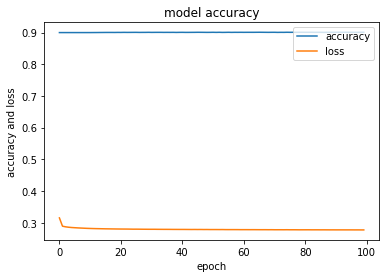

In [400]:
import matplotlib.pyplot as plt
plt.plot(history_ncr.history['accuracy'])
plt.plot(history_ncr.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

In [402]:
NN_ncr = NNmodel_ncr.predict(X_test_ncr_sc)

1922/1922 [==============================] - 1s 485us/step


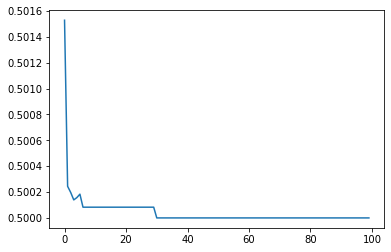

In [403]:
ncr_NN = []
for i in range(1,101):
    y_pred_ncr_NN = (NN_ncr > i/100).astype(int)
    ncr_NN.append(roc_auc_score(y_test_ncr, y_pred_ncr_NN))
plt.plot(ncr_NN)
plt.show()

In [407]:
y_pred_ncr_NN = (NN_ncr > 0.01).astype(int)
evaluation_metrics(y_test_ncr, y_pred_ncr_NN)

precision is 0.8541814351170439,recall is 0.9135651919418565,f1 is 0.8791282615251969, roc is 0.5015278019451326, accuracy is 0.9135651919418565, Specificity is 0.9929952417172271, G_Mean is 0.9071658885967487.


(0.8541814351170439,
 0.9135651919418565,
 0.8791282615251969,
 0.5015278019451326,
 0.9135651919418565,
 0.9929952417172271,
 0.9071658885967487)

## ML Algorithm - PCA 

In [ ]:
from random import sample
import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel

In [ ]:
df_train_pca = df_train.drop(labels = ['SK_ID_CURR', 'TARGET'], axis = 1)
n_col = len(df_train_pca.columns)

values = df_train_pca
correlation = values.corr()
correlation

In [ ]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components = 20)
pc1 = pca1.fit_transform(values)
pc1_df = pd.DataFrame(pc1,columns = ['pc_1','pc_2','pc_3','pc_4','pc_5','pc_6','pc_7','pc_8','pc_9','pc_10', 
                                     'pc_11', 'pc_12','pc_13','pc_14','pc_15','pc_16','pc_17','pc_18','pc_19','pc_20'])                                               
 
pc1_df["TARGET"] = df_train["TARGET"]
pc1_df

In [ ]:
Train, Test = train_test_split(pc1_df,
                               test_size=0.2,
                               random_state=0)
X_train_pca, y_train_pca = Train.iloc[:,:-1], Train.iloc[:,-1]
X_test_pca, y_test_pca = Test.iloc[:,:-1], Test.iloc[:,-1]

### Logistic 

In [ ]:
LR = LogisticRegression(max_iter = 1000)
Lresult = LR.fit(X_train_pca, y_train_pca)

y_pred_LR = LR.predict(X_test_pca)
Accuracy_LR = accuracy_score(y_test_pca, y_pred_LR)

print("The accuracy for Logistic Regression is", Accuracy_LR)

In [ ]:
print(evaluation_metrics(y_test_pca, y_pred_LR))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lr_roc_auc_pca = roc_auc_score(y_test_pca, y_pred_LR)
fpr, tpr, thresholds = roc_curve(y_test_pca, LR.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc_pca)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RF_model = RandomForestClassifier(n_estimators=100, random_state=1, max_features="sqrt", max_depth=34)
RF_model.fit(X_train_pca, y_train_pca)

y_pred_RF = RF_model.predict(X_test_pca)

Accuracy_RF = accuracy_score(y_test_pca, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

In [ ]:
print(evaluation_metrics(y_test_pca, y_pred_RF))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc_pca = roc_auc_score(y_test_pca, y_pred_RF)
fpr, tpr, thresholds = roc_curve(y_test_pca, RF_model.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc_pca)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Gradient Boosting 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier(n_estimators=100, random_state=1, 
                                       max_features="sqrt", learning_rate=0.055, max_depth=24)
GB_model.fit(X_train_pca, y_train_pca)

y_pred_GB = GB_model.predict(X_test_pca)
Accuracy_GB = accuracy_score(y_test_pca, y_pred_GB)
print("GB Accuracy:",Accuracy_GB)

In [ ]:
print(evaluation_metrics(y_test_pca, y_pred_GB))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gb_roc_auc_pca = roc_auc_score(y_test_pca, y_pred_GB)
fpr, tpr, thresholds = roc_curve(y_test_pca, GB_model.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc_pca)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Appendix 

### SVM for Original Dataset 

In [ ]:
# from sklearn import svm
# svc = svm.SVC(probability = True)
# svc.fit(X_train, y_train)

# y_pred_SVM = svc.predict(X_test)
# Accuracy_SVM = metrics.accuracy_score(y_test, y_pred_SVM)
# print("SVM Accuracy:", Accuracy_SVM)
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred_SVM))

# from sklearn.metrics import roc_curve
# from sklearn.metrics import auc
# from sklearn.metrics import roc_auc_score
# svm_roc_auc = roc_auc_score(y_test, y_pred_SVM)
# fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:, 1])
# plt.figure()
# plt.plot(fpr, tpr, label = 'Support Vector Machines(area = %0.2f)' % svm_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()

### SVM for SMOTE

In [ ]:
# from sklearn import svm
# svc = svm.SVC(probability=True)
# svc.fit(X_train_res, y_train_res)

# y_pred_SVM = svc.predict(X_test_SMOTE)
# Accuracy_SVM = metrics.accuracy_score(y_test_SMOTE, y_pred_SVM)
# print("SVM Accuracy:", Accuracy_SVM)

# print(classification_report(y_test_SMOTE, y_pred_SVM))

# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# svm_roc_auc_smote = roc_auc_score(y_test_SMOTE, y_pred_SVM)
# fpr, tpr, thresholds = roc_curve(y_test_SMOTE, svc.predict_proba(X_test_SMOTE)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Support Vector Machine (area = %0.2f)' % svm_roc_auc_smote)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()

### SVM for RandomOverSampling 

In [ ]:
# from sklearn import svm
# svc = svm.SVC(probability = True)
# svc.fit(X_train_ros, y_train_ros)

# y_pred_SVM = svc.predict(X_test_ROS)
# Accuracy_SVM = metrics.accuracy_score(y_test_ROS, y_pred_SVM)
# print("SVM Accuracy:", Accuracy_SVM)

# print(classification_report(y_test_ROS, y_pred_SVM))

# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# svm_roc_auc_ROS = roc_auc_score(y_test_ROS, y_pred_SVM)
# fpr, tpr, thresholds = roc_curve(y_test_ROS, svc.predict_proba(X_test_ROS)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Support Vector Machine (area = %0.2f)' % svm_roc_auc_ROS)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()

### SVM for Adaptive Synthetic

In [ ]:
# from sklearn import svm
# svc = svm.SVC(probability = True)
# svc.fit(X_train_ADA, y_train_ADA)

# y_pred_SVM = svc.predict(X_test_AS)
# Accuracy_SVM = metrics.accuracy_score(y_test_AS, y_pred_SVM)
# print("SVM Accuracy:", Accuracy_SVM)

# print(classification_report(y_test_AS, y_pred_SVM))

# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# svm_roc_auc_AS = roc_auc_score(y_test_AS, y_pred_SVM)
# fpr, tpr, thresholds = roc_curve(y_test_AS, svc.predict_proba(X_test_AS)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Support Vector Machine (area = %0.2f)' % svm_roc_auc_AS)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()

### SVM for Borderline-1 SMOTE

In [ ]:
# from sklearn import svm
# svc = svm.SVC(probability = True)
# svc.fit(X_train_smb, y_train_smb)

# y_pred_SVM = svc.predict(X_test_smb)
# Accuracy_SVM = metrics.accuracy_score(y_test_smb, y_pred_SVM)
# print("SVM Accuracy:", Accuracy_SVM)

# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# svm_roc_auc_AS = roc_auc_score(y_test_smb, y_pred_SVM)
# fpr, tpr, thresholds = roc_curve(y_test_smb, svc.predict_proba(X_test_AS)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Support Vector Machine (area = %0.2f)' % svm_roc_auc_smb)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()


### SVM for NearMiss 

In [ ]:
# from sklearn import svm
# svc = svm.SVC(probability = True)
# svc.fit(X_train_miss, y_train_miss)

# y_pred_SVM = svc.predict(X_test_miss)
# Accuracy_SVM = metrics.accuracy_score(y_test_miss, y_pred_SVM)
# print("SVM Accuracy:", Accuracy_SVM)

# print(clsmbsification_report(y_test_miss, y_pred_SVM))

# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# svm_roc_auc_miss = roc_auc_score(y_test_miss, y_pred_SVM)
# fpr, tpr, thresholds = roc_curve(y_test_miss, svc.predict_proba(X_test_miss)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Support Vector Machine (area = %0.2f)' % svm_roc_auc_miss)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()

### SVM for RandomUnderSampling

In [ ]:
# from sklearn import svm
# svc = svm.SVC(probability = True)
# svc.fit(X_train_us, y_train_us)

# y_pred_SVM = svc.predict(X_test_us)
# Accuracy_SVM = metrics.accuracy_score(y_test_us, y_pred_SVM)
# print("SVM Accuracy:", Accuracy_SVM)

# print(clsmbsification_report(y_test_us, y_pred_GB))

# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# svm_roc_auc_us = roc_auc_score(y_test_us, y_pred_SVM)
# fpr, tpr, thresholds = roc_curve(y_test_us, svc.predict_proba(X_test_us)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Support Vector Machine (area = %0.2f)' % svm_roc_auc_us)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()

### SVM for NeighbourhoodCleaningRule

In [ ]:

# from sklearn import svm
# svc = svm.SVC(probability = True)
# svc.fit(X_train_ncr, y_train_ncr)

# y_pred_SVM = svc.predict(X_test_ncr)
# Accuracy_SVM = metrics.accuracy_score(y_test_ncr, y_pred_SVM)
# print("SVM Accuracy:", Accuracy_SVM)

# print(evaluate_matrix(y_test_ncr, y_pred_SVM))

# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# svm_roc_auc_ncr = roc_auc_score(y_test_ncr, y_pred_SVM)
# fpr, tpr, thresholds = roc_curve(y_test_ncr, svc.predict_proba(X_test_ncr)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Support Vector Machine (area = %0.2f)' % svm_roc_auc_ncr)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()

### SVM for PCA 

In [ ]:
# from sklearn import svm
# svc = svm.SVC(probability = True)
# svc.fit(X_train_pca, y_train_pca)

# y_pred_SVM = svc.predict(X_test_pca)
# Accuracy_SVM = metrics.accuracy_score(y_test_pca, y_pred_SVM)
# print("SVM Accuracy:", Accuracy_SVM)

# print(clsmbsification_report(y_test_pca, y_pred_SVM))

# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# svm_roc_auc_pca = roc_auc_score(y_test_pca, y_pred_SVM)
# fpr, tpr, thresholds = roc_curve(y_test_pca, svc.predict_proba(X_test_pca)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Support Vector Machine (area = %0.2f)' % svm_roc_auc_pca)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()